<div style = "text-align: center"><font size = 5.5 color = "#B22222" face = "verdana"><b>Groundwater level prediction</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "black" face = "verdana"><b>Well: Dinajpur-34(Dinajpur Sadar)</b></font></div>
<br/> 
<br/> 
<div style = "text-align: center"><font size = 4 color = "#00008B" face = "verdana"><b>Md.Abdullah-Al Mamun</b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Master's Programme in Data Science</b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Tampere University, Finland.</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "#00008B" face = "verdana"><b>Mst. Nazneen Aktar</b></font></div>

<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Salon seudun ammattiopisto, Finland</b></font></div><br/> 

# 1. Introduction

## About the dataset


Data was collected from meteorological stations in Rangpur, Saidpur, and Dinajpur through multiple sources, including the Bangladesh Meteorological Department (BMD), Bangladesh Water Development Board (BWDB), Food and Agricultural Organization (FAO), National Oceanic and Atmospheric Association (NOAA) Climate Prediction Center (CPC), Bangladesh Bureau of Statistics, and National Aeronautics and Space Administration (NASA). Additionally, monthly groundwater level (GWL) data for 12 selected wells was acquired from the Bangladesh Water Development Board (BWDB). The MODIS data was initially in Network Common Data Form (NetCDF) format and was subsequently converted to Excel format. This extensive dataset encompasses the period from 1993 to 2017.

We collected groundwater level data from three wells in the Rangpur district, four wells in Saidpur (Nilphamari), and five wells in the Dinajpur district from the Bangladesh Water Development Board (BWDB). Groundwater level data collected daily(for particular dates in a month). However, groundwater level data, temperature data, and rainfall data are specific to their respective geographic areas, while the remaining data is common to all 12 wells' groundwater levels. We have predicted groundwater levels for each well sepeartly using various machine learning models, hyperparameter tuning, and hybrid modeling techniques. Finally, we have visualized our findings. 


## Data: 

**1.Groundwater Level (m)**
- GWL_Dinajpur-34

**2. Temperature (°C)**
- Dinajpur_Tave

**3. Rainfall (mm)**
- Dinajpur_PRCP

**4. MODIS Normalized Difference Vegetation Index (NDVI)**
- Dinajpur_NDVI

**5. Indian Ocean Dipole (IOD)**
- IOD
    
**6. Southern Oscillation Index (SOI)**
- SOI
    
**7. Nina3.4 Value**
- Nina3.4
    
**8. MEI Value**
- MEI


#### Note: 

1. We transformed monthly data into daily values, assuming they represent monthly averages. Due to a small dataset of only 300 rows, we applied a technique to treat it as daily data. Additionally, we normalized the data to maintain consistent scales, crucial for effective machine learning modelling.

2. Converting to daily values and normalizing aims to provide a solid foundation for accurate machine learning predictions and analyses. This preprocessing step enhances the reliability and performance of our models.


## Identifying the Features and Targets

### Features (Independent Variables):

1. Dinajpur_Tave
2. Dinajpur_PRCP
3. Dinajpur_NDVI
4. IOD
5. SOI
6. Nina3.4
7. MEI

### Target (Dependent Variable):

1.  GWL_Dinajpur-34

## Libraries

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from scipy import stats
from tbats import TBATS
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from skopt.space import Integer, Real
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

### Loading dataset...

In [2]:
df = pd.read_excel(r'D:\Jupyter\Ground water level prediction(Towfiq Sir)\GWP\final_data_Dinajpur_34.xlsx')
df

,Date,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI,GWL_Dinajpur-34
0,01.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
1,02.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
2,03.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
3,04.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
4,05.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333
9127,28.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333
9128,29.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333
9129,30.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333


In [3]:
df.columns

Index(['Date', 'Dinajpur_Tave', 'Dinajpur_PRCP', 'Dinajpur_NDVI', 'IOD', 'SOI',
       'Nina3.4', 'MEI', 'GWL_Dinajpur-34'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             9131 non-null   object 
 1   Dinajpur_Tave    9131 non-null   float64
 2   Dinajpur_PRCP    9131 non-null   int64  
 3   Dinajpur_NDVI    9131 non-null   float64
 4   IOD              9131 non-null   float64
 5   SOI              9131 non-null   float64
 6   Nina3.4          9131 non-null   float64
 7   MEI              9131 non-null   float64
 8   GWL_Dinajpur-34  9131 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 642.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,9131.0,26.316318,11.841618,13.20000,22.300000,27.30000,29.000000,213.200000
Dinajpur_PRCP,9131.0,162.677363,193.538334,0.00000,3.000000,74.00000,285.000000,1026.000000
Dinajpur_NDVI,9131.0,0.217515,0.082181,0.06320,0.152000,0.19990,0.271600,0.445800
IOD,9131.0,0.004448,0.344990,-0.88667,-0.203742,-0.02345,0.207985,1.472656
SOI,9131.0,-0.491052,10.714015,-28.60000,-7.800000,0.10000,7.700000,27.100000
Nina3.4,9131.0,0.007095,0.870827,-1.79000,-0.560000,-0.08000,0.480000,2.570000
MEI,9131.0,-0.005756,1.035444,-1.96400,-0.771000,-0.22500,0.612500,3.214000
GWL_Dinajpur-34,9131.0,4.508836,0.671660,1.93750,4.028571,4.55000,4.925000,6.075000


In [6]:
df["GWL_Dinajpur-34"].describe()

count    9131.000000
mean        4.508836
std         0.671660
min         1.937500
25%         4.028571
50%         4.550000
75%         4.925000
max         6.075000
Name: GWL_Dinajpur-34, dtype: float64

In [7]:
cols_to_convert = df.columns.difference(['Date'])
df[cols_to_convert] = df[cols_to_convert].astype(float)

# 2. Data Exploration and Analysis
## Visualizing the distribution


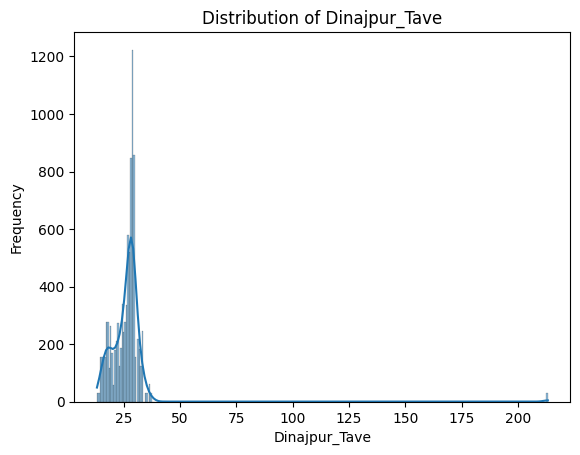

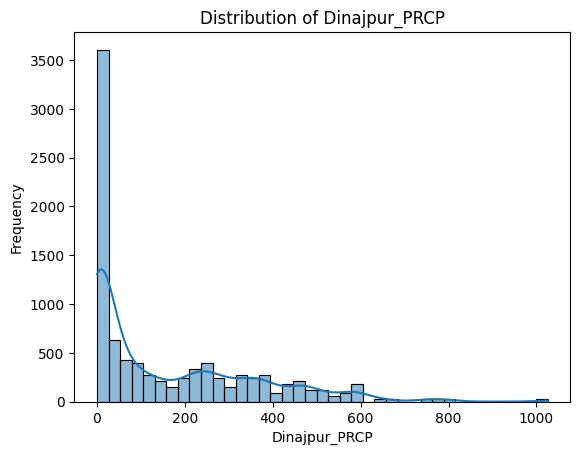

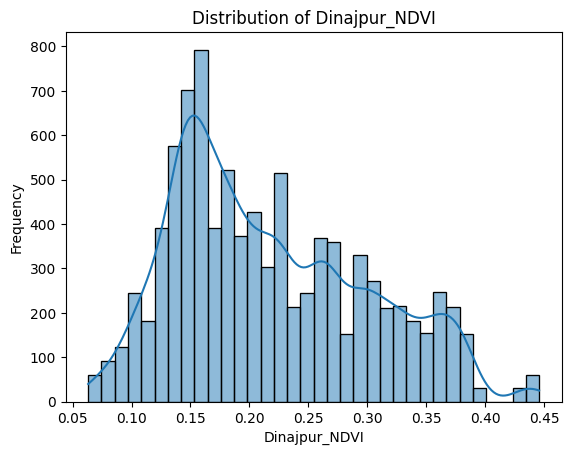

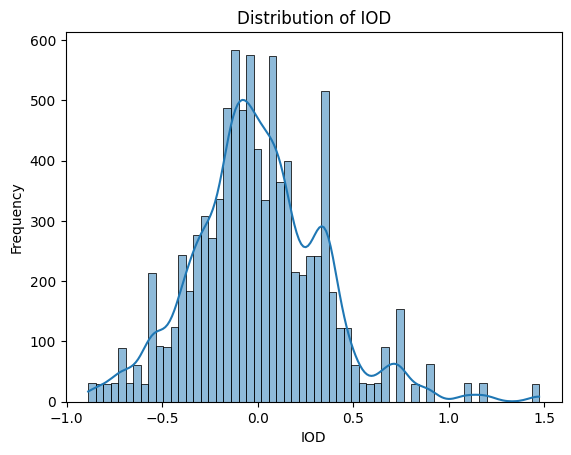

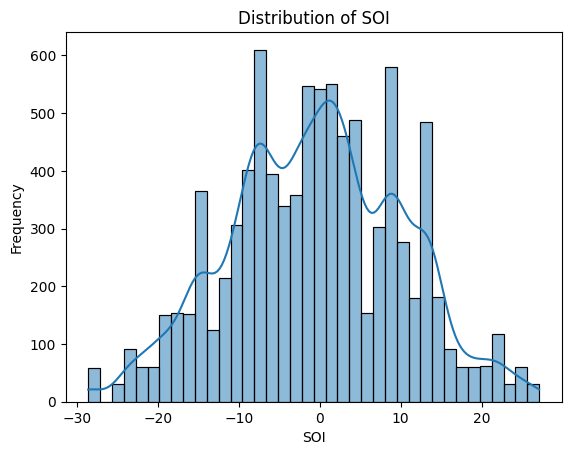

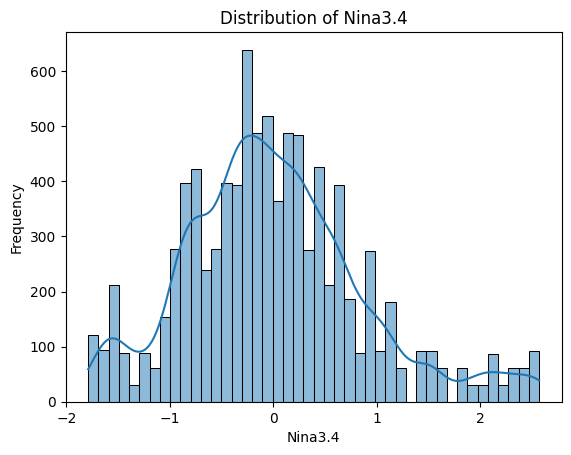

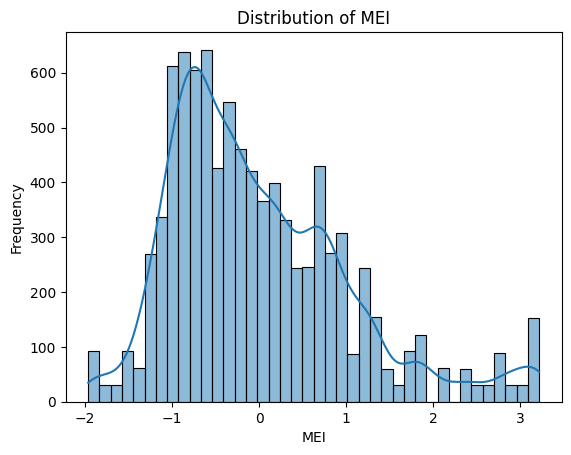

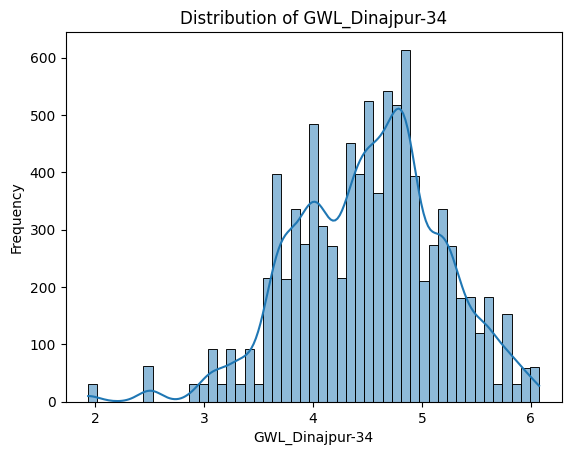

In [8]:
def plot_distribution(df, columns):
    for column in columns:
        if column != 'Date':  
            sns.histplot(df[column], kde=True)
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)  
            plt.ylabel("Frequency")  
            plt.show()


numerical_cols = df.columns[1:]  

plot_distribution(df, numerical_cols)

## Data Cleaning,Checking errors, Missing values

In [9]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Calling the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [10]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [11]:
def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [12]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten() 
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()        
        
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

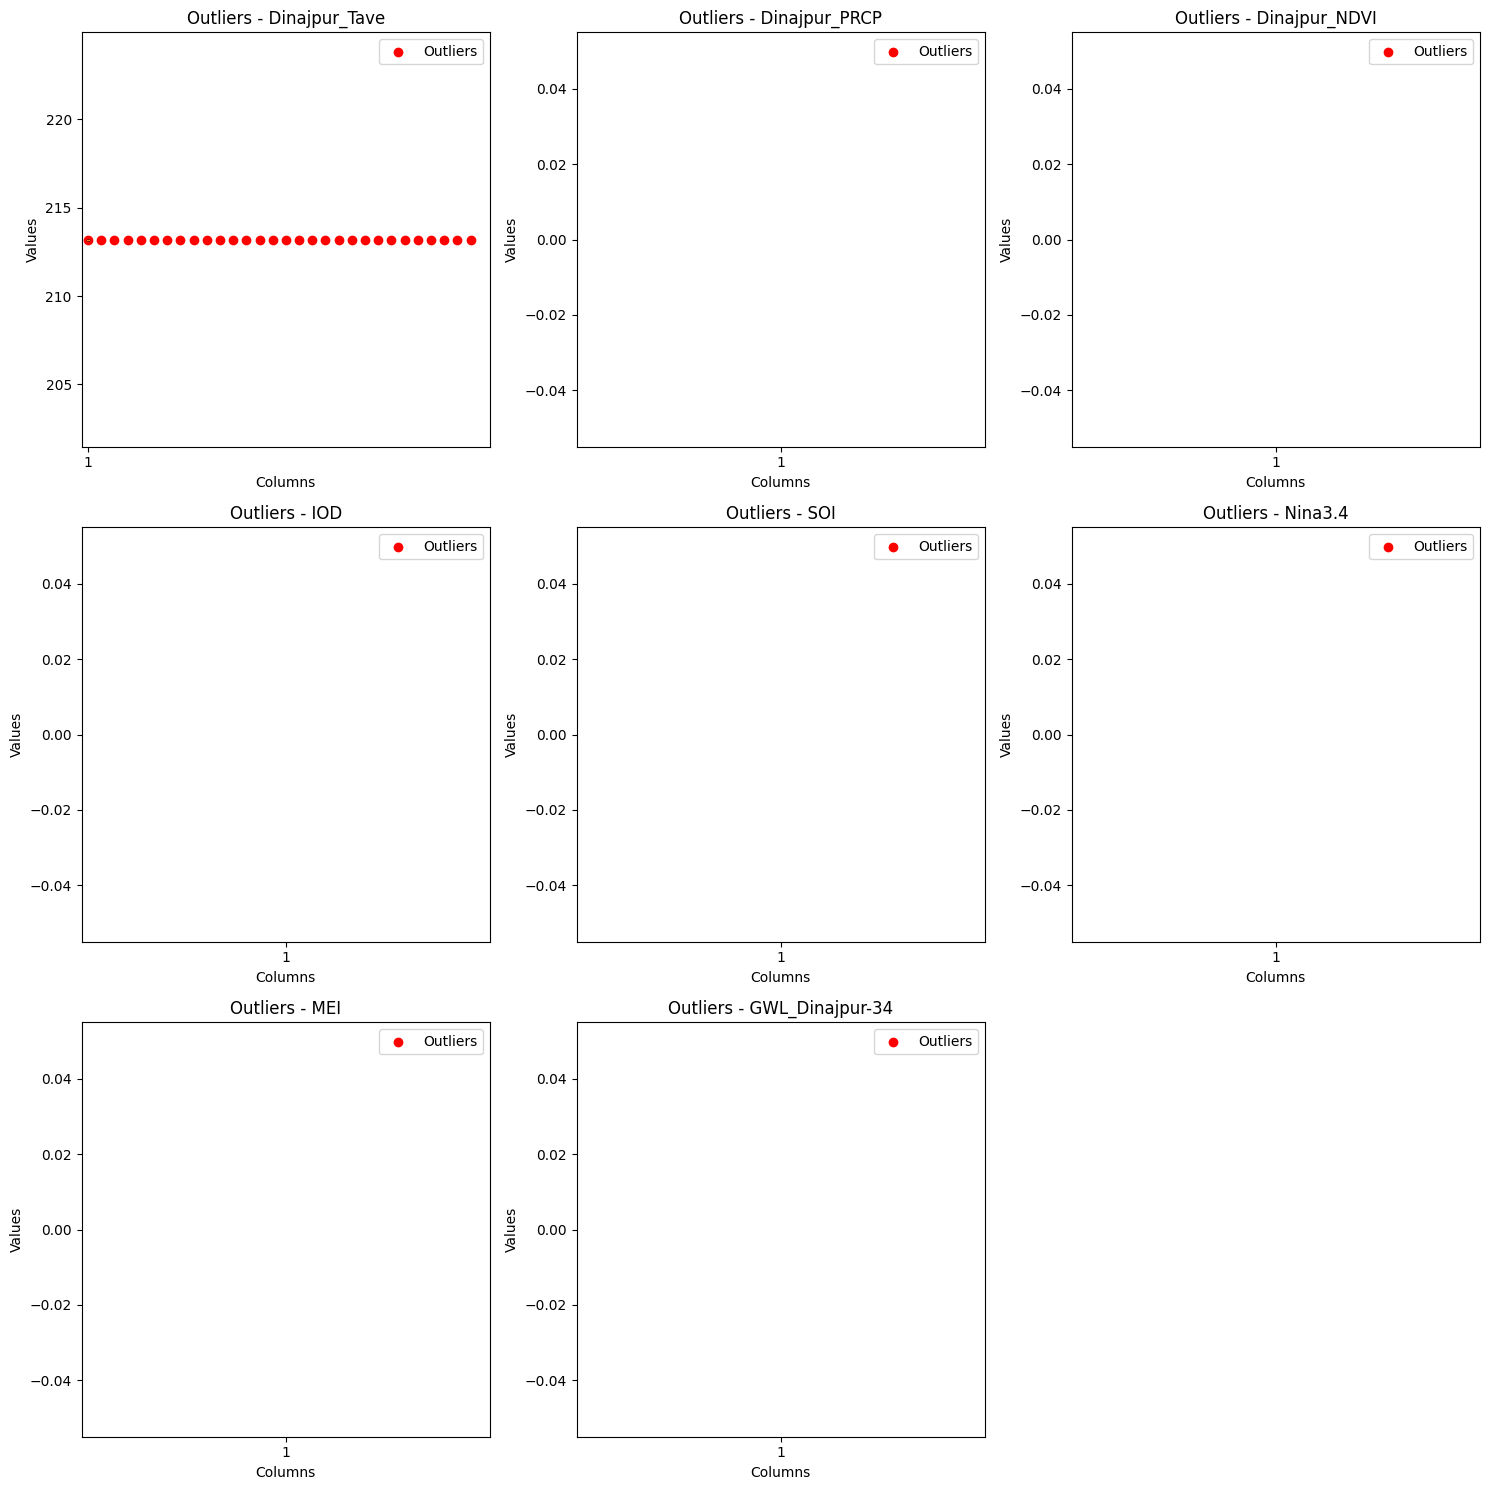

Number of total outliers: 1097


In [13]:
# Detecting outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualizing outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

## Multicollinearity statistics

In [14]:
numeric_df = df.iloc[:, 2:-1]  

# Calculating VIF for each variable
vif_data = numeric_df.copy()
vif_data['Intercept'] = 1 

# Calculating VIF values
vif_values = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                       index=vif_data.columns)

# Calculating Tolerance from VIF
tolerance_values = 1 / vif_values

# Displaying the results
print("VIF Values:")
print(vif_values)

print("\nTolerance Values:")
print(tolerance_values)

VIF Values:
Dinajpur_PRCP    1.021349
Dinajpur_NDVI    1.090597
IOD              1.194382
SOI              2.160887
Nina3.4          2.619188
MEI              1.544756
Intercept        9.464926
dtype: float64

Tolerance Values:
Dinajpur_PRCP    0.979097
Dinajpur_NDVI    0.916929
IOD              0.837253
SOI              0.462773
Nina3.4          0.381798
MEI              0.647351
Intercept        0.105653
dtype: float64


# 3.  Machine Learning Modelling

## Data Splitting

In [15]:
X = df.drop(columns=['GWL_Dinajpur-34', 'Date'])
y = df['GWL_Dinajpur-34']

# Splitting data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### ## Visualization: Data Splitting for Machine Learning

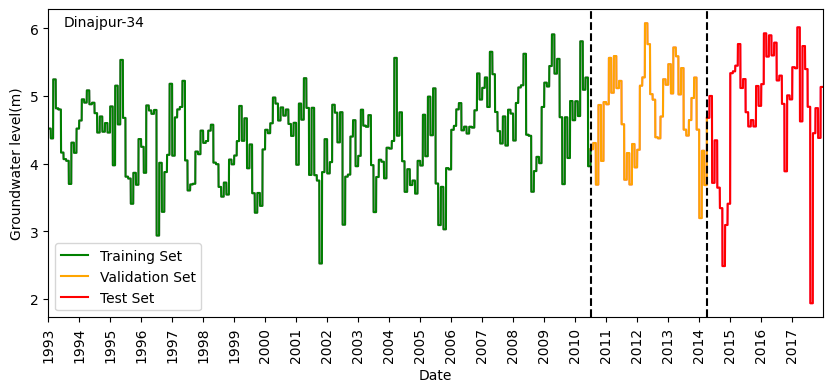

In [16]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Sorting DataFrame by 'Date'
df = df.sort_values(by='Date')

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Plotting the entire dataset
plt.plot(df['Date'], df['GWL_Dinajpur-34'], color='violet')

# Plotting training data
plt.plot(df['Date'][:len(X_train)], df['GWL_Dinajpur-34'][:len(X_train)], color='green', label='Training Set')

# Plotting validation data
plt.plot(df['Date'][len(X_train):len(X_train) + len(X_val)], df['GWL_Dinajpur-34'][len(X_train):len(X_train) + len(X_val)], color='orange', label='Validation Set')

# Plotting test data
plt.plot(df['Date'][len(X_train) + len(X_val):], df['GWL_Dinajpur-34'][len(X_train) + len(X_val):], color='red', label='Test Set')

plt.axvline(df['Date'][len(X_train)], color='black', linestyle='--')
plt.axvline(df['Date'][len(X_train) + len(X_val)], color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Groundwater level(m)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(df['Date'].min(), df['Date'].max())
plt.xticks(rotation=90) 
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)
plt.legend()
plt.show()

In [17]:
X_train

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
3063,27.7,222.0,0.3292,-0.157832,-9.0,-0.30,-0.322
1940,26.4,148.0,0.1080,-0.131525,-24.4,0.90,2.821
6848,27.4,0.0,0.1967,0.348779,7.3,-0.93,-0.071
3509,28.9,246.0,0.1252,-0.293105,-14.6,0.70,0.636
1612,29.1,501.0,0.1765,0.010510,-24.1,1.15,2.602
...,...,...,...,...,...,...,...
5734,28.7,242.0,0.1999,0.050483,13.5,-0.28,-0.318
5191,23.2,2.0,0.2692,0.147723,-1.4,-0.15,-0.864
5390,26.8,51.0,0.1459,0.130834,5.4,-1.40,-0.669
860,30.3,54.0,0.2495,-0.039353,-9.0,0.03,0.940


In [18]:
y_train

3063    4.823333
1940    4.575000
6848    3.692000
3509    3.807500
1612    4.048000
          ...   
5734    3.890000
5191    4.837500
5390    4.267500
860     5.532500
7270    5.246667
Name: GWL_Dinajpur-34, Length: 6391, dtype: float64

In [19]:
X_temp

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
4043,14.8,7.0,0.1418,-0.116838,-11.6,0.26,0.526
3573,26.4,56.0,0.3521,0.626101,-7.4,1.16,1.090
4505,27.1,255.0,0.1897,0.196267,-14.5,0.30,0.588
5381,28.3,234.0,0.1418,0.380060,1.4,-1.04,-0.800
2881,22.6,0.0,0.1011,-0.029802,22.4,-0.75,-0.397
...,...,...,...,...,...,...,...
1489,15.5,21.0,0.2406,-0.058970,4.1,-0.43,-0.453
812,23.8,10.0,0.2367,0.107568,3.5,0.49,0.935
1882,19.6,17.0,0.1146,0.134668,-19.2,2.08,2.823
4974,29.5,126.0,0.1101,0.164956,-15.9,0.37,-0.474


In [20]:
y_temp

4043    4.2225
3573    4.4000
4505    4.4200
5381    4.6975
2881    4.4100
         ...  
1489    4.1180
812     5.1520
1882    4.3340
4974    4.5450
4039    4.2225
Name: GWL_Dinajpur-34, Length: 2740, dtype: float64

In [21]:
X_val

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
7609,21.4,0.0,0.1407,-0.067228,9.2,-0.02,-0.911
4084,25.2,12.0,0.1778,-0.109683,0.2,-0.10,0.118
7920,32.1,424.0,0.1272,-0.465427,-7.6,0.37,-0.523
8327,31.4,0.0,0.3561,0.403764,-20.2,2.21,-0.228
2716,28.9,399.0,0.1538,-0.067885,-5.5,-0.75,-0.711
...,...,...,...,...,...,...,...
5762,26.3,45.0,0.3646,0.102282,13.4,-0.30,-0.012
3254,213.2,53.0,0.1593,-0.082291,7.2,-0.28,-0.290
4541,29.3,474.0,0.1731,0.016435,2.6,0.22,0.737
350,19.0,0.0,0.1413,-0.157270,1.6,0.19,0.784


In [22]:
X_test

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
4710,21.7,0.0,0.1467,-0.361621,-2.0,-0.44,-0.998
131,26.8,308.0,0.1435,0.312997,-8.2,0.93,1.860
2802,27.9,196.0,0.1075,0.012307,9.9,-0.39,-0.113
4472,24.4,37.0,0.1239,-0.561639,0.2,0.28,0.631
1108,16.5,16.0,0.2660,0.337663,8.4,-0.65,-0.437
...,...,...,...,...,...,...,...
2948,15.5,0.0,0.2584,0.152971,8.4,-0.88,-0.706
6394,29.6,356.0,0.3326,-0.197084,20.5,-0.89,-1.964
1746,25.5,3.0,0.1809,1.088737,-17.8,2.29,3.214
5820,19.1,0.0,0.4334,-0.102193,13.3,-0.90,-0.540


In [23]:
y_val

7609    5.2720
4084    5.5625
7920    3.3425
8327    4.5500
2716    4.6375
         ...  
5762    4.1000
3254    3.8750
4541    5.1125
350     4.5180
2164    3.9900
Name: GWL_Dinajpur-34, Length: 1370, dtype: float64

In [24]:
y_test

4710    3.934000
131     4.800000
2802    4.800000
4472    4.110000
1108    4.248333
          ...   
2948    3.984000
6394    4.213333
1746    4.178333
5820    4.837500
6160    4.925000
Name: GWL_Dinajpur-34, Length: 1370, dtype: float64

### Data Split Validation


In [25]:
# Getting the indices of the data points in each set
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

# Checking if there's any overlap between the sets
assert len(set(train_indices).intersection(val_indices)) == 0, "Overlap between training and validation sets!"
assert len(set(train_indices).intersection(test_indices)) == 0, "Overlap between training and test sets!"
assert len(set(val_indices).intersection(test_indices)) == 0, "Overlap between validation and test sets!"

# If the code reaches this point, it means there is no overlap
print("No overlap detected. Data splitting is correct.")

No overlap detected. Data splitting is correct.


### Descriptive Statistics(Training,Validation and Testing stage)

In [26]:
# Training Set: Descriptive Statistics
train_stats = X_train.describe()
print("Descriptive Statistics: Training Set ")
train_stats.T

Descriptive Statistics: Training Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,6391.0,26.531920,12.933740,13.20000,22.500000,27.400000,29.100000,213.200000
Dinajpur_PRCP,6391.0,165.978251,195.709441,0.00000,3.000000,77.000000,287.000000,1026.000000
Dinajpur_NDVI,6391.0,0.218292,0.082821,0.06320,0.152000,0.201200,0.274000,0.445800
IOD,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [27]:
# Validation Set: Descriptive Statistics
val_stats = X_val.describe()
print("\nDescriptive Statistics: Validation Set ")
val_stats.T


Descriptive Statistics: Validation Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.709197,7.157877,13.20000,22.125000,27.00000,29.000000,213.200000
Dinajpur_PRCP,1370.0,153.270803,184.765685,0.00000,3.000000,64.00000,273.000000,1026.000000
Dinajpur_NDVI,1370.0,0.217190,0.080513,0.06320,0.153275,0.19960,0.274000,0.445800
IOD,1370.0,0.003595,0.355028,-0.88667,-0.204923,-0.02345,0.213949,1.472656
SOI,1370.0,-0.599489,10.584601,-28.60000,-8.000000,0.10000,7.300000,27.100000
Nina3.4,1370.0,0.015898,0.864088,-1.79000,-0.545000,-0.07000,0.470000,2.570000
MEI,1370.0,-0.015441,1.004000,-1.96400,-0.730500,-0.25600,0.582000,3.214000


In [28]:
# Test Set: Descriptive Statistics
test_stats = X_test.describe()
print("\nDescriptive Statistics: Testing Set ")
test_stats.T


Descriptive Statistics: Testing Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.917664,10.118151,13.20000,22.100000,27.300000,28.900000,213.200000
Dinajpur_PRCP,1370.0,156.685401,191.600047,0.00000,1.000000,55.000000,281.000000,1026.000000
Dinajpur_NDVI,1370.0,0.214213,0.080795,0.06320,0.148500,0.199600,0.267800,0.445800
IOD,1370.0,0.017447,0.347552,-0.88667,-0.178294,0.010084,0.227375,1.472656
SOI,1370.0,-0.607445,11.051441,-28.60000,-7.900000,0.000000,7.700000,27.100000
Nina3.4,1370.0,0.008496,0.900322,-1.79000,-0.570000,-0.090000,0.480000,2.570000
MEI,1370.0,0.024823,1.057025,-1.96400,-0.729000,-0.220000,0.644000,3.214000


## Normalization of the data

In [29]:
# Normalization of the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

X_val = pd.DataFrame(
    scaler.transform(X_val),
    columns = X_val.columns
)

In [30]:
X_train.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,0.09032,0.286272,1.339238,-0.466604,-0.802092,-0.352135,-0.300534
1,-0.01020,-0.091869,-1.331796,-0.389732,-2.245590,1.033736,2.729244


In [31]:
X_test.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,-0.373620,-0.848151,-0.864486,-1.062112,-0.145957,-0.513820,-0.952183
1,0.020729,0.725733,-0.903126,0.909241,-0.727105,1.068383,1.802862


In [32]:
X_val.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,-0.396817,-0.848151,-0.936937,-0.201844,0.903860,-0.028765,-0.868317
1,-0.102988,-0.786831,-0.488947,-0.325903,0.060257,-0.121156,0.123615


## Machine Learning Modelling

In [33]:
# Base models

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'ElasticNet Regression': ElasticNet(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'LGBM Regressor': lgb.LGBMRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Locally Weighted Linear Regression': KNeighborsRegressor(n_neighbors=5, weights='distance')
}

results = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting on the training set
    y_pred_train = model.predict(X_train)
    
    # Predicting on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predicting on the test set
    y_pred_test = model.predict(X_test)

    # Calculating metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculating metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculating metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test CC': test_cc
    }

# Printing the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:}")
    print("\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1443
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 4.504602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1443
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 4.504602
Metrics for Linear Regression:
Train RMSE: 0.6042416144613502
Train MAE: 0.4778873613073856
Train R-squared: 0.2035154026885203
Train RAE: 0.11236028210135689
Train CC: 0.45112681441975955
Validation RMSE: 0.6181272788197235
Validation MAE: 0.49419017777367646
Validation R-squared: 0.15965001729312955
Validation RAE: 0

# 4. Hyperparameter tuning

## 1. Random Forest Regressor ( Hyperparameter Tuning)

In [34]:
# Initializing Random Forest model
random_forest = RandomForestRegressor()

# the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 5, 10],    
    'min_samples_split': [2, 5, 10] 
}

# Initializing Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Performing Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Getting the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predicting on training set using Random Forest
rf_pred_train = best_rf.predict(X_train)

# Calculating metrics for Random Forest on training set
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_mae_train = mean_absolute_error(y_train, rf_pred_train)
rf_r2_train = r2_score(y_train, rf_pred_train)
rf_rae_train = mean_absolute_percentage_error(y_train, rf_pred_train)
rf_cc_train = np.corrcoef(y_train, rf_pred_train)[0, 1]

# Predicting on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculating metrics for Random Forest on validation set
rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)
rf_rae_val = mean_absolute_percentage_error(y_val, rf_pred_val)
rf_cc_val = np.corrcoef(y_val, rf_pred_val)[0, 1]

# Predicting on test set using Random Forest
rf_pred_test = best_rf.predict(X_test)

# Calculating metrics for Random Forest on test set
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred_test))
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)
rf_rae_test = mean_absolute_percentage_error(y_test, rf_pred_test)
rf_cc_test = np.corrcoef(y_test, rf_pred_test)[0, 1]

print("Best Hyperparameters for Random Forest:", best_params_rf)
print()

# Printing metrics for training set
print("Random Forest RMSE (Train):", rf_rmse_train)
print("Random Forest MAE (Train):", rf_mae_train)
print("Random Forest R-squared (Train):", rf_r2_train)
print("Random Forest RAE (Train):", rf_rae_train)
print("Random Forest CC (Train):", rf_cc_train)

print()


print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)
print("Random Forest RAE (Validation):", rf_rae_val)
print("Random Forest CC (Validation):", rf_cc_val)

print()

print("Random Forest RMSE (Test):", rf_rmse_test)
print("Random Forest MAE (Test):", rf_mae_test)
print("Random Forest R-squared (Test):", rf_r2_test)
print("Random Forest RAE (Test):", rf_rae_test)
print("Random Forest CC (Test):", rf_cc_test)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest RMSE (Train): 3.0799580961883207e-15
Random Forest MAE (Train): 2.6643962857910815e-15
Random Forest R-squared (Train): 1.0
Random Forest RAE (Train): 5.881970324734316e-16
Random Forest CC (Train): 1.0

Random Forest RMSE (Validation): 3.0270722545849133e-15
Random Forest MAE (Validation): 2.621747101654968e-15
Random Forest R-squared (Validation): 1.0
Random Forest RAE (Validation): 5.805617620079351e-16
Random Forest CC (Validation): 0.9999999999999993

Random Forest RMSE (Test): 3.109249557754335e-15
Random Forest MAE (Test): 2.6940331555210733e-15
Random Forest R-squared (Test): 1.0
Random Forest RAE (Test): 5.932353247491587e-16
Random Forest CC (Test): 0.9999999999999998


## 2. LWLR ( Hyperparameter Tuning)

In [35]:
# the range of neighbors to consider
param_grid_lwlr = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'] 
}

# Initializing LWLR model
lwlr = KNeighborsRegressor()

# Initializing Grid Search for LWLR
grid_search_lwlr = GridSearchCV(lwlr, param_grid_lwlr, scoring='neg_mean_squared_error', cv=5)

# Performing Grid Search for LWLR
grid_search_lwlr.fit(X_train, y_train)

# Getting the best hyperparameters and model for LWLR
best_lwlr = grid_search_lwlr.best_estimator_
best_params_lwlr = grid_search_lwlr.best_params_

# Predicting on training set using LWLR
lwlr_pred_train = best_lwlr.predict(X_train)

# Calculating metrics for LWLR on training set
lwlr_rmse_train = np.sqrt(mean_squared_error(y_train, lwlr_pred_train))
lwlr_mae_train = mean_absolute_error(y_train, lwlr_pred_train)
lwlr_r2_train = r2_score(y_train, lwlr_pred_train)
lwlr_rae_train = mean_absolute_percentage_error(y_train, lwlr_pred_train)
lwlr_cc_train = np.corrcoef(y_train, lwlr_pred_train)[0, 1]

# Predicting on validation set using LWLR
lwlr_pred_val = best_lwlr.predict(X_val)

# Calculating metrics for LWLR on validation set
lwlr_rmse_val = np.sqrt(mean_squared_error(y_val, lwlr_pred_val))
lwlr_mae_val = mean_absolute_error(y_val, lwlr_pred_val)
lwlr_r2_val = r2_score(y_val, lwlr_pred_val)
lwlr_rae_val = mean_absolute_percentage_error(y_val, lwlr_pred_val)
lwlr_cc_val = np.corrcoef(y_val, lwlr_pred_val)[0, 1]

# Predicting on test set using LWLR
lwlr_pred_test = best_lwlr.predict(X_test)

# Calculating metrics for LWLR on test set
lwlr_rmse_test = np.sqrt(mean_squared_error(y_test, lwlr_pred_test))
lwlr_mae_test = mean_absolute_error(y_test, lwlr_pred_test)
lwlr_r2_test = r2_score(y_test, lwlr_pred_test)
lwlr_rae_test = mean_absolute_percentage_error(y_test, lwlr_pred_test)
lwlr_cc_test = np.corrcoef(y_test, lwlr_pred_test)[0, 1]

print("Best Hyperparameters for LWLR:", best_params_lwlr)
print()

# Printing metrics for training set
print("LWLR RMSE (Train):", lwlr_rmse_train)
print("LWLR MAE (Train):", lwlr_mae_train)
print("LWLR R-squared (Train):", lwlr_r2_train)
print("LWLR RAE (Train):", lwlr_rae_train)
print("LWLR CC (Train):", lwlr_cc_train)

print()

print("LWLR RMSE (Validation):", lwlr_rmse_val)
print("LWLR MAE (Validation):", lwlr_mae_val)
print("LWLR R-squared (Validation):", lwlr_r2_val)
print("LWLR RAE (Validation):", lwlr_rae_val)
print("LWLR CC (Validation):", lwlr_cc_val)

print()

# Printing metrics for test set
print("LWLR RMSE (Test):", lwlr_rmse_test)
print("LWLR MAE (Test):", lwlr_mae_test)
print("LWLR R-squared (Test):", lwlr_r2_test)
print("LWLR RAE (Test):", lwlr_rae_test)
print("LWLR CC (Test):", lwlr_cc_test)


Best Hyperparameters for LWLR: {'n_neighbors': 5, 'weights': 'uniform'}

LWLR RMSE (Train): 1.013696458246229e-16
LWLR MAE (Train): 2.3139055997507567e-17
LWLR R-squared (Train): 1.0
LWLR RAE (Train): 6.169865097051666e-18
LWLR CC (Train): 1.0

LWLR RMSE (Validation): 1.1382330514343598e-16
LWLR MAE (Validation): 2.917374371277784e-17
LWLR R-squared (Validation): 1.0
LWLR RAE (Validation): 7.714109001275127e-18
LWLR CC (Validation): 0.9999999999999999

LWLR RMSE (Test): 9.820810677009503e-17
LWLR MAE (Test): 2.17182314306235e-17
LWLR R-squared (Test): 1.0
LWLR RAE (Test): 5.782165163672031e-18
LWLR CC (Test): 1.0


## 3. Gaussian Process Regression ( Hyperparameter Tuning)

In [36]:
# the hyperparameters and their possible values for Gaussian Process Regression
param_grid_gpr = {
    'kernel': [None, 1.0 * RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5), WhiteKernel(noise_level=1.0)],   
  
}

# Initializing Grid Search for Gaussian Process Regression
grid_search_gpr = GridSearchCV(GaussianProcessRegressor(), param_grid_gpr, scoring='neg_mean_squared_error', cv=5)
grid_search_gpr.fit(X_train, y_train)

# Getting the best hyperparameters and model for Gaussian Process Regression
best_gpr = grid_search_gpr.best_estimator_
best_params_gpr = grid_search_gpr.best_params_

# Predicting on training set using Gaussian Process Regression
gpr_pred_train = best_gpr.predict(X_train)

# Calculating metrics for Gaussian Process Regression on training set
gpr_rmse_train = np.sqrt(mean_squared_error(y_train, gpr_pred_train))
gpr_mae_train = mean_absolute_error(y_train, gpr_pred_train)
gpr_r2_train = r2_score(y_train, gpr_pred_train)
gpr_rae_train = mean_absolute_percentage_error(y_train, gpr_pred_train)
gpr_cc_train = np.corrcoef(y_train, gpr_pred_train)[0, 1]

# Predicting on validation set using Gaussian Process Regression
gpr_pred_val = best_gpr.predict(X_val)

# Calculating metrics for Gaussian Process Regression on validation set
gpr_rmse_val = np.sqrt(mean_squared_error(y_val, gpr_pred_val))
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)
gpr_rae_val = mean_absolute_percentage_error(y_val, gpr_pred_val)
gpr_cc_val = np.corrcoef(y_val, gpr_pred_val)[0, 1]

# Predicting on test set using Gaussian Process Regression
gpr_pred_test = best_gpr.predict(X_test)

# Calculating metrics for Gaussian Process Regression on test set
gpr_rmse_test = np.sqrt(mean_squared_error(y_test, gpr_pred_test))
gpr_mae_test = mean_absolute_error(y_test, gpr_pred_test)
gpr_r2_test = r2_score(y_test, gpr_pred_test)
gpr_rae_test = mean_absolute_percentage_error(y_test, gpr_pred_test)
gpr_cc_test = np.corrcoef(y_test, gpr_pred_test)[0, 1]

print("Best Hyperparameters for Gaussian Process Regression:", best_params_gpr)
print()

# Printing metrics for training set
print("Gaussian Process RMSE (Train):", gpr_rmse_train)
print("Gaussian Process MAE (Train):", gpr_mae_train)
print("Gaussian Process R-squared (Train):", gpr_r2_train)
print("Gaussian Process RAE (Train):", gpr_rae_train)
print("Gaussian Process CC (Train):", gpr_cc_train)

print()

print("Gaussian Process RMSE (Validation):", gpr_rmse_val)
print("Gaussian Process MAE (Validation):", gpr_mae_val)
print("Gaussian Process R-squared (Validation):", gpr_r2_val)
print("Gaussian Process RAE (Validation):", gpr_rae_val)
print("Gaussian Process CC (Validation):", gpr_cc_val) 

print()

# Printing metrics for test set
print("Gaussian Process RMSE (Test):", gpr_rmse_test)
print("Gaussian Process MAE (Test):", gpr_mae_test)
print("Gaussian Process R-squared (Test):", gpr_r2_test)
print("Gaussian Process RAE (Test):", gpr_rae_test)
print("Gaussian Process CC (Test):", gpr_cc_test)

D:\Jupyter\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Best Hyperparameters for Gaussian Process Regression: {'kernel': Matern(length_scale=1, nu=1.5)}

Gaussian Process RMSE (Train): 8.439757167736438e-12
Gaussian Process MAE (Train): 6.742234789037793e-12
Gaussian Process R-squared (Train): 1.0
Gaussian Process RAE (Train): 1.543390854948711e-12
Gaussian Process CC (Train): 1.0

Gaussian Process RMSE (Validation): 8.992237398514035e-12
Gaussian Process MAE (Validation): 7.17690886444605e-12
Gaussian Process R-squared (Validation): 1.0
Gaussian Process RAE (Validation): 1.6380310131477408e-12
Gaussian Process CC (Validation): 1.0

Gaussian Process RMSE (Test): 9.026717692201153e-12
Gaussian Process MAE (Test): 7.28644557504817e-12
Gaussian Process R-squared (Test): 1.0
Gaussian Process RAE (Test): 1.6380347816994337e-12
Gaussian Process CC (Test): 1.0


## 4. Weighted K-Nearest Neighbors ( Hyperparameter Tuning)

In [37]:
# the hyperparameters and their possible values for Weighted K-Nearest Neighbors
param_grid_wknn = {
     'n_neighbors': [3, 5, 7, 9, 11],   
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']  
}

# Initializing Grid Search for Weighted K-Nearest Neighbors
grid_search_wknn = GridSearchCV(KNeighborsRegressor(weights='distance'), param_grid_wknn, scoring='neg_mean_squared_error', cv=5)
grid_search_wknn.fit(X_train, y_train)

# Getting the best hyperparameters and model for Weighted K-Nearest Neighbors
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predicting on training set using Weighted K-Nearest Neighbors
wknn_pred_train = best_wknn.predict(X_train)

# Calculating metrics for Weighted K-Nearest Neighbors on training set
wknn_rmse_train = np.sqrt(mean_squared_error(y_train, wknn_pred_train))
wknn_mae_train = mean_absolute_error(y_train, wknn_pred_train)
wknn_r2_train = r2_score(y_train, wknn_pred_train)
wknn_rae_train = mean_absolute_percentage_error(y_train, wknn_pred_train)

wknn_cc_train = np.corrcoef(y_train, wknn_pred_train)[0, 1]

# Predicting on validation set using Weighted K-Nearest Neighbors
wknn_pred_val = best_wknn.predict(X_val)

# Calculating metrics for Weighted K-Nearest Neighbors on validation set
wknn_rmse_val = np.sqrt(mean_squared_error(y_val, wknn_pred_val))
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)
wknn_rae_val = mean_absolute_percentage_error(y_val, wknn_pred_val)

wknn_cc_val = np.corrcoef(y_val, wknn_pred_val)[0, 1]

# Predicting on test set using Weighted K-Nearest Neighbors
wknn_pred_test = best_wknn.predict(X_test)

# Calculating metrics for Weighted K-Nearest Neighbors on test set
wknn_rmse_test = np.sqrt(mean_squared_error(y_test, wknn_pred_test))
wknn_mae_test = mean_absolute_error(y_test, wknn_pred_test)
wknn_r2_test = r2_score(y_test, wknn_pred_test)
wknn_rae_test = mean_absolute_percentage_error(y_test, wknn_pred_test)

wknn_cc_test = np.corrcoef(y_test, wknn_pred_test)[0, 1]

print("Best Hyperparameters for Weighted K-Nearest Neighbors:", best_params_wknn)
print()

# Printing metrics for training set
print("Weighted K-NN RMSE (Train):", wknn_rmse_train)
print("Weighted K-NN MAE (Train):", wknn_mae_train)
print("Weighted K-NN R-squared (Train):", wknn_r2_train)
print("Weighted K-NN RAE (Train):", wknn_rae_train)
print("Weighted K-NN CC (Train):", wknn_cc_train)

print()

print("Weighted K-NN RMSE (Validation):", wknn_rmse_val)
print("Weighted K-NN MAE (Validation):", wknn_mae_val)
print("Weighted K-NN R-squared (Validation):", wknn_r2_val)
print("Weighted K-NN RAE (Validation):", wknn_rae_val)
print("Weighted K-NN CC (Validation):", wknn_cc_val) 

print()

# Printing metrics for test set
print("Weighted K-NN RMSE (Test):", wknn_rmse_test)
print("Weighted K-NN MAE (Test):", wknn_mae_test)
print("Weighted K-NN R-squared (Test):", wknn_r2_test)
print("Weighted K-NN RAE (Test):", wknn_rae_test)
print("Weighted K-NN CC (Test):", wknn_cc_test)

Best Hyperparameters for Weighted K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1}

Weighted K-NN RMSE (Train): 1.013696458246229e-16
Weighted K-NN MAE (Train): 2.3139055997507567e-17
Weighted K-NN R-squared (Train): 1.0
Weighted K-NN RAE (Train): 6.169865097051666e-18
Weighted K-NN CC (Train): 1.0

Weighted K-NN RMSE (Validation): 1.1382330514343598e-16
Weighted K-NN MAE (Validation): 2.917374371277784e-17
Weighted K-NN R-squared (Validation): 1.0
Weighted K-NN RAE (Validation): 7.714109001275127e-18
Weighted K-NN CC (Validation): 0.9999999999999999

Weighted K-NN RMSE (Test): 9.820810677009503e-17
Weighted K-NN MAE (Test): 2.17182314306235e-17
Weighted K-NN R-squared (Test): 1.0
Weighted K-NN RAE (Test): 5.782165163672031e-18
Weighted K-NN CC (Test): 1.0


## 5. K-Nearest Neighbors ( Hyperparameter Tuning)

In [38]:
# the range of neighbors and weights to consider
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],  
    'metric': ['euclidean', 'manhattan'] 
}

# Initializing KNN model
knn = KNeighborsRegressor()

# Initializing Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Performing Grid Search
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Training the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Predicting on training set
knn_pred_train = best_knn.predict(X_train)

# Calculating metrics for KNN on training set
knn_rmse_train = np.sqrt(mean_squared_error(y_train, knn_pred_train))
knn_mae_train = mean_absolute_error(y_train, knn_pred_train)
knn_r2_train = r2_score(y_train, knn_pred_train)
knn_rae_train = mean_absolute_percentage_error(y_train, knn_pred_train)
knn_cc_train = np.corrcoef(y_train, knn_pred_train)[0, 1]

# Predicting on validation set
knn_pred_val = best_knn.predict(X_val)

# Calculating metrics for KNN on validation set
knn_rmse_val = np.sqrt(mean_squared_error(y_val, knn_pred_val))
knn_mae_val = mean_absolute_error(y_val, knn_pred_val)
knn_r2_val = r2_score(y_val, knn_pred_val)
knn_rae_val = mean_absolute_percentage_error(y_val, knn_pred_val)
knn_cc_val = np.corrcoef(y_val, knn_pred_val)[0, 1]

# Predicting on test set
knn_pred_test = best_knn.predict(X_test)

# Calculating metrics for KNN on test set
knn_rmse_test = np.sqrt(mean_squared_error(y_test, knn_pred_test))
knn_mae_test = mean_absolute_error(y_test, knn_pred_test)
knn_r2_test = r2_score(y_test, knn_pred_test)
knn_rae_test = mean_absolute_percentage_error(y_test, knn_pred_test)
knn_cc_test = np.corrcoef(y_test, knn_pred_test)[0, 1]

print("Best Hyperparameters for KNN:", best_params)
print()

# Printing metrics for training set
print("KNN RMSE (Train):", knn_rmse_train)
print("KNN MAE (Train):", knn_mae_train)
print("KNN R-squared (Train):", knn_r2_train)
print("KNN RAE (Train):", knn_rae_train)
print("KNN CC (Train):", knn_cc_train)

print()

print("KNN RMSE (Validation):", knn_rmse_val)
print("KNN MAE (Validation):", knn_mae_val)
print("KNN R-squared (Validation):", knn_r2_val)
print("KNN RAE (Validation):", knn_rae_val)
print("KNN CC (Validation):", knn_cc_val)

print()

# Printing metrics for test set
print("KNN RMSE (Test):", knn_rmse_test)
print("KNN MAE (Test):", knn_mae_test)
print("KNN R-squared (Test):", knn_r2_test)
print("KNN RAE (Test):", knn_rae_test)
print("KNN CC (Test):", knn_cc_test)

Best Hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

KNN RMSE (Train): 1.013696458246229e-16
KNN MAE (Train): 2.3139055997507567e-17
KNN R-squared (Train): 1.0
KNN RAE (Train): 6.169865097051666e-18
KNN CC (Train): 1.0

KNN RMSE (Validation): 1.1382330514343598e-16
KNN MAE (Validation): 2.917374371277784e-17
KNN R-squared (Validation): 1.0
KNN RAE (Validation): 7.714109001275127e-18
KNN CC (Validation): 0.9999999999999999

KNN RMSE (Test): 9.820810677009503e-17
KNN MAE (Test): 2.17182314306235e-17
KNN R-squared (Test): 1.0
KNN RAE (Test): 5.782165163672031e-18
KNN CC (Test): 1.0


## 6. XGBoost Regressor ( Hyperparameter Tuning)

In [39]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'gamma': Real(0, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for XGBoost Regressor
bayes_search_xgb = BayesSearchCV(
    XGBRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10, 
    random_state=42,  
    n_jobs=-1,  
    verbose=1, 
    n_points=5, 
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_xgb.fit(X_train, y_train)

# Getting the best hyperparameters and model for XGBoost Regressor
best_xgb = bayes_search_xgb.best_estimator_
best_params_xgb = bayes_search_xgb.best_params_

# Predicting on training set using XGBoost Regressor
xgb_pred_train = best_xgb.predict(X_train)

# Calculating metrics for XGBoost Regressor on training set
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
xgb_mae_train = mean_absolute_error(y_train, xgb_pred_train)
xgb_r2_train = r2_score(y_train, xgb_pred_train)
xgb_rae_train = mean_absolute_percentage_error(y_train, xgb_pred_train)
xgb_cc_train = np.corrcoef(y_train, xgb_pred_train)[0, 1]

# Predicting on validation set using XGBoost Regressor
xgb_pred_val = best_xgb.predict(X_val)

# Calculating metrics for XGBoost Regressor on validation set
xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)
xgb_rae_val = mean_absolute_percentage_error(y_val, xgb_pred_val)
xgb_cc_val = np.corrcoef(y_val, xgb_pred_val)[0, 1]

# Predicting on test set using XGBoost Regressor
xgb_pred_test = best_xgb.predict(X_test)

# Calculating metrics for XGBoost Regressor on test set
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))
xgb_mae_test = mean_absolute_error(y_test, xgb_pred_test)
xgb_r2_test = r2_score(y_test, xgb_pred_test)
xgb_rae_test = mean_absolute_percentage_error(y_test, xgb_pred_test)
xgb_cc_test = np.corrcoef(y_test, xgb_pred_test)[0, 1]

print("Best Hyperparameters for XGBoost Regressor:", best_params_xgb)
print()

# Printing metrics for training set
print("XGBoost RMSE (Train):", xgb_rmse_train)
print("XGBoost MAE (Train):", xgb_mae_train)
print("XGBoost R-squared (Train):", xgb_r2_train)
print("XGBoost RAE (Train):", xgb_rae_train)
print("XGBoost CC (Train):", xgb_cc_train)

print()

print("XGBoost RMSE (Validation):", xgb_rmse_val)
print("XGBoost MAE (Validation):", xgb_mae_val)
print("XGBoost R-squared (Validation):", xgb_r2_val)
print("XGBoost RAE (Validation):", xgb_rae_val)
print("XGBoost CC (Validation):", xgb_cc_val)

print()

# Printing metrics for test set
print("XGBoost RMSE (Test):", xgb_rmse_test)
print("XGBoost MAE (Test):", xgb_mae_test)
print("XGBoost R-squared (Test):", xgb_r2_test)
print("XGBoost RAE (Test):", xgb_rae_test)
print("XGBoost CC (Test):", xgb_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for XGBoost Regressor: OrderedDict([('gamma', 0.009563585051707605), ('learning_rate', 0.13856447107447098), ('max_depth', 5), ('n_estimators', 162)])
XGBoost RMSE (Train): 0.024780456006877033
XGBoost MAE (Train): 0.018980031621004808
XGBoost R-squared (Train): 0.9986604013369536
XGBoost RAE (Train): 0.0043307079706476
XGBoost CC (Train): 0.9995167597934379

XGBoost RMSE (Validation): 0.02774949482781719
XGBoost MAE (Validation): 0.021338228175786747
XGBoost R-squared (Validation): 0.99830638559844
XGBoost RAE (Validation): 0.00486477178342949
XGBoost CC (Validation): 0.999396013716

XGBoost RMSE (Test): 0.02680832643445448
XGBoost MAE (Test): 0.020735513244604997
XGBoost R-squared (Test): 0.9982577037008883
XGBoost RAE (Test): 0.004673776889133806
XGBoost CC (Test): 0.999392670180856


## 7. CatBoost Regressor  ( Hyperparameter Tuning)

In [40]:
# Defining the search space for hyperparameters
param_dist = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for CatBoost Regressor
bayes_search_catboost = BayesSearchCV(
    CatBoostRegressor(verbose=0),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,
    random_state=42,  
    n_jobs=-1, 
    verbose=1,  
    n_points=5,
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_catboost.fit(X_train, y_train)

# Getting the best hyperparameters and model for CatBoost Regressor
best_catboost = bayes_search_catboost.best_estimator_
best_params_catboost = bayes_search_catboost.best_params_

# Predicting on training set using CatBoost Regressor
catboost_pred_train = best_catboost.predict(X_train)

# Calculating metrics for CatBoost Regressor on training set
catboost_rmse_train = np.sqrt(mean_squared_error(y_train, catboost_pred_train))
catboost_mae_train = mean_absolute_error(y_train, catboost_pred_train)
catboost_r2_train = r2_score(y_train, catboost_pred_train)
catboost_rae_train = mean_absolute_percentage_error(y_train, catboost_pred_train)
catboost_cc_train = np.corrcoef(y_train, catboost_pred_train)[0, 1]

# Predicting on validation set using CatBoost Regressor
catboost_pred_val = best_catboost.predict(X_val)

# Calculating metrics for CatBoost Regressor on validation set
catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_pred_val))
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)
catboost_rae_val = mean_absolute_percentage_error(y_val, catboost_pred_val)
catboost_cc_val = np.corrcoef(y_val, catboost_pred_val)[0, 1]

# Predicting on test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)

# Calculating metrics for CatBoost Regressor on test set
catboost_rmse_test = np.sqrt(mean_squared_error(y_test, catboost_pred_test))
catboost_mae_test = mean_absolute_error(y_test, catboost_pred_test)
catboost_r2_test = r2_score(y_test, catboost_pred_test)
catboost_rae_test = mean_absolute_percentage_error(y_test, catboost_pred_test)
catboost_cc_test = np.corrcoef(y_test, catboost_pred_test)[0, 1]

print("Best Hyperparameters for CatBoost Regressor:", best_params_catboost)
print()

# Printing metrics for training set
print("CatBoost RMSE (Train):", catboost_rmse_train)
print("CatBoost MAE (Train):", catboost_mae_train)
print("CatBoost R-squared (Train):", catboost_r2_train)
print("CatBoost RAE (Train):", catboost_rae_train)
print("CatBoost CC (Train):", catboost_cc_train)

print()

print("CatBoost RMSE (Validation):", catboost_rmse_val)
print("CatBoost MAE (Validation):", catboost_mae_val)
print("CatBoost R-squared (Validation):", catboost_r2_val)
print("CatBoost RAE (Validation):", catboost_rae_val)
print("CatBoost CC (Validation):", catboost_cc_val)

print()

# Printing metrics for test set
print("CatBoost RMSE (Test):", catboost_rmse_test)
print("CatBoost MAE (Test):", catboost_mae_test)
print("CatBoost R-squared (Test):", catboost_r2_test)
print("CatBoost RAE (Test):", catboost_rae_test)
print("CatBoost CC (Test):", catboost_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for CatBoost Regressor: OrderedDict([('depth', 8), ('iterations', 226), ('learning_rate', 0.19853585997384401)])

CatBoost RMSE (Train): 0.0003749093917523929
CatBoost MAE (Train): 0.0002895525604821913
CatBoost R-squared (Train): 0.9999996933741554
CatBoost RAE (Train): 6.615283900379407e-05
CatBoost CC (Train): 0.999999873217826

CatBoost RMSE (Validation): 0.00042912899318830463
CatBoost MAE (Validation): 0.00033133373611647133
CatBoost R-squared (Validation): 0.9999995949766226
CatBoost RAE (Validation): 7.538938554222685e-05
CatBoost CC (Validation): 0.9999998353206883

CatBoost RMSE (Test): 0.00041160851171418886
CatBoost MAE (Test): 0.000320811686869316
CatBoost R-squared (Test): 0.9999995892748452
CatBoost RAE (Test): 7.257881771102527e-05
CatBoost CC (Test): 0.9999998371080271


## 8. LightGBM Regressor ( Hyperparameter Tuning)

In [41]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for LightGBM Regressor
bayes_search_lgb = BayesSearchCV(
    LGBMRegressor(verbosity=-1), 
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42, 
    n_jobs=-1,  
    verbose=1, 
    n_points=5,  
    refit=True 
)

# Performing Bayesian Optimization
bayes_search_lgb.fit(X_train, y_train)

# Getting the best hyperparameters and model for LightGBM Regressor
best_lgb = bayes_search_lgb.best_estimator_
best_params_lgb = bayes_search_lgb.best_params_

# Predicting on training set using LightGBM Regressor
lgb_pred_train = best_lgb.predict(X_train)

# Calculating metrics for LightGBM Regressor on training set
lgb_rmse_train = np.sqrt(mean_squared_error(y_train, lgb_pred_train))
lgb_mae_train = mean_absolute_error(y_train, lgb_pred_train)
lgb_r2_train = r2_score(y_train, lgb_pred_train)
lgb_rae_train = mean_absolute_percentage_error(y_train, lgb_pred_train)
lgb_cc_train = np.corrcoef(y_train, lgb_pred_train)[0, 1]

# Predicting on validation set using LightGBM Regressor
lgb_pred_val = best_lgb.predict(X_val)

# Calculating metrics for LightGBM Regressor on validation set
lgb_rmse_val = np.sqrt(mean_squared_error(y_val, lgb_pred_val))
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)
lgb_rae_val = mean_absolute_percentage_error(y_val, lgb_pred_val)
lgb_cc_val = np.corrcoef(y_val, lgb_pred_val)[0, 1]

# Predicting on test set using LightGBM Regressor
lgb_pred_test = best_lgb.predict(X_test)

# Calculating metrics for LightGBM Regressor on test set
lgb_rmse_test = np.sqrt(mean_squared_error(y_test, lgb_pred_test))
lgb_mae_test = mean_absolute_error(y_test, lgb_pred_test)
lgb_r2_test = r2_score(y_test, lgb_pred_test)
lgb_rae_test = mean_absolute_percentage_error(y_test, lgb_pred_test)
lgb_cc_test = np.corrcoef(y_test, lgb_pred_test)[0, 1]


print("Best Hyperparameters for LightGBM Regressor:", best_params_lgb)

# Printing metrics for training set
print("LightGBM RMSE (Train):", lgb_rmse_train)
print("LightGBM MAE (Train):", lgb_mae_train)
print("LightGBM R-squared (Train):", lgb_r2_train)
print("LightGBM RAE (Train):", lgb_rae_train)
print("LightGBM CC (Train):", lgb_cc_train)

print()

print("LightGBM RMSE (Validation):", lgb_rmse_val)
print("LightGBM MAE (Validation):", lgb_mae_val)
print("LightGBM R-squared (Validation):", lgb_r2_val)
print("LightGBM RAE (Validation):", lgb_rae_val)
print("LightGBM CC (Validation):", lgb_cc_val)

print()

# Printing metrics for test set
print("LightGBM RMSE (Test):", lgb_rmse_test)
print("LightGBM MAE (Test):", lgb_mae_test)
print("LightGBM R-squared (Test):", lgb_r2_test)
print("LightGBM RAE (Test):", lgb_rae_test)
print("LightGBM CC (Test):", lgb_cc_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for LightGBM Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
LightGBM RMSE (Train): 0.003926146756084681
LightGBM MAE (Train): 0.0027580759891133073
LightGBM R-squared (Train): 0.999966372918551
LightGBM RAE (Train): 0.0006310356520693004
LightGBM CC (Train): 0.9999855665145738

LightGBM RMSE (Validation): 0.004631347005845318
LightGBM MAE (Validation): 0.0032462993111289336
LightGBM R-squared (Validation): 0.9999528242276281
LightGBM RAE (Validation): 0.0007421536287668788
LightGBM CC (Validation): 0.9999800058724144

LightGBM RMSE (Test): 0.004478876930187052
LightGBM MAE (Test): 0.0031448011573065944
LightGBM R-squared (Test): 0.9999513681415599
LightGBM RAE (Test): 0.0007085843367795198
LightGBM CC (Test): 0.9999800832726833


## 9. Gradient Boosting Regressor ( Hyperparameter Tuning)

In [42]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for Gradient Boosting Regressor
bayes_search_gbr = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),  
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42,
    n_jobs=-1, 
    verbose=1, 
    n_points=5,  
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_gbr.fit(X_train, y_train)

# Getting the best hyperparameters and model for Gradient Boosting Regressor
best_gbr = bayes_search_gbr.best_estimator_
best_params_gbr = bayes_search_gbr.best_params_

# Predicting on training set using Gradient Boosting Regressor
gbr_pred_train = best_gbr.predict(X_train)

# Calculating metrics for Gradient Boosting Regressor on training set
gbr_rmse_train = np.sqrt(mean_squared_error(y_train, gbr_pred_train))
gbr_mae_train = mean_absolute_error(y_train, gbr_pred_train)
gbr_r2_train = r2_score(y_train, gbr_pred_train)
gbr_rae_train = mean_absolute_percentage_error(y_train, gbr_pred_train)
gbr_cc_train = np.corrcoef(y_train, gbr_pred_train)[0, 1]

# Predicting on validation set using Gradient Boosting Regressor
gbr_pred_val = best_gbr.predict(X_val)

# Calculating metrics for Gradient Boosting Regressor on validation set
gbr_rmse_val = np.sqrt(mean_squared_error(y_val, gbr_pred_val))
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)
gbr_rae_val = mean_absolute_percentage_error(y_val, gbr_pred_val)
gbr_cc_val = np.corrcoef(y_val, gbr_pred_val)[0, 1]

# Predicting on test set using Gradient Boosting Regressor
gbr_pred_test = best_gbr.predict(X_test)

# Calculating metrics for Gradient Boosting Regressor on test set
gbr_rmse_test = np.sqrt(mean_squared_error(y_test, gbr_pred_test))
gbr_mae_test = mean_absolute_error(y_test, gbr_pred_test)
gbr_r2_test = r2_score(y_test, gbr_pred_test)
gbr_rae_test = mean_absolute_percentage_error(y_test, gbr_pred_test)
gbr_cc_test = np.corrcoef(y_test, gbr_pred_test)[0, 1]

print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print()

# Printing metrics for training set
print("Gradient Boosting RMSE (Train):", gbr_rmse_train)
print("Gradient Boosting MAE (Train):", gbr_mae_train)
print("Gradient Boosting R-squared (Train):", gbr_r2_train)
print("Gradient Boosting RAE (Train):", gbr_rae_train)
print("Gradient Boosting CC (Train):", gbr_cc_train)

print()

print("Gradient Boosting RMSE (Validation):", gbr_rmse_val)
print("Gradient Boosting MAE (Validation):", gbr_mae_val)
print("Gradient Boosting R-squared (Validation):", gbr_r2_val)
print("Gradient Boosting RAE (Validation):", gbr_rae_val)
print("Gradient Boosting CC (Validation):", gbr_cc_val)

print()

# Printing metrics for test set
print("Gradient Boosting RMSE (Test):", gbr_rmse_test)
print("Gradient Boosting MAE (Test):", gbr_mae_test)
print("Gradient Boosting R-squared (Test):", gbr_r2_test)
print("Gradient Boosting RAE (Test):", gbr_rae_test)
print("Gradient Boosting CC (Test):", gbr_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Gradient Boosting Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])

Gradient Boosting RMSE (Train): 0.0034381190661363667
Gradient Boosting MAE (Train): 0.002648214300790716
Gradient Boosting R-squared (Train): 0.9999742131708403
Gradient Boosting RAE (Train): 0.0006068853973241608
Gradient Boosting CC (Train): 0.9999893992470394

Gradient Boosting RMSE (Validation): 0.0037872054527362396
Gradient Boosting MAE (Validation): 0.0029452666459291433
Gradient Boosting R-squared (Validation): 0.999968454159209
Gradient Boosting RAE (Validation): 0.0006720686703357055
Gradient Boosting CC (Validation): 0.999987521647786

Gradient Boosting RMSE (Test): 0.003559687567551599
Gradient Boosting MAE (Test): 0.0027445752840925836
Gradient Boosting R-squared (Test): 0.9999692810496859
Gradient Boosting

## 10.Ridge Regression ( Hyperparameter Tuning)

In [43]:
# Defining the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} 

# Initializing Ridge model
ridge = Ridge(max_iter=10000)

# Initializing Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Training the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Getting the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_

# Predicting on training set using Ridge Regression
ridge_pred_train = best_ridge.predict(X_train)

# Calculating metrics for Ridge Regression on training set
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_mae_train = mean_absolute_error(y_train, ridge_pred_train)
ridge_r2_train = r2_score(y_train, ridge_pred_train)
ridge_rae_train = mean_absolute_percentage_error(y_train, ridge_pred_train)
ridge_cc_train = np.corrcoef(y_train, ridge_pred_train)[0, 1]

# Predicting on validation set using Ridge Regression
ridge_pred_val = best_ridge.predict(X_val)

# Calculating metrics for Ridge Regression on validation set
ridge_rmse_val = np.sqrt(mean_squared_error(y_val, ridge_pred_val))
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)
ridge_rae_val = mean_absolute_percentage_error(y_val, ridge_pred_val)
ridge_cc_val = np.corrcoef(y_val, ridge_pred_val)[0, 1]

# Predicting on test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Calculating metrics for Ridge Regression on test set
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
ridge_mae_test = mean_absolute_error(y_test, ridge_pred_test)
ridge_r2_test = r2_score(y_test, ridge_pred_test)
ridge_rae_test = mean_absolute_percentage_error(y_test, ridge_pred_test)
ridge_cc_test = np.corrcoef(y_test, ridge_pred_test)[0, 1]

print("Best Hyperparameters for Ridge Regression:", grid_search_ridge.best_params_)
print()

# Printing metrics for training set
print("Ridge Regression RMSE (Train):", ridge_rmse_train)
print("Ridge Regression MAE (Train):", ridge_mae_train)
print("Ridge Regression R-squared (Train):", ridge_r2_train)
print("Ridge Regression RAE (Train):", ridge_rae_train)
print("Ridge Regression CC (Train):", ridge_cc_train)

print()

print("Ridge Regression RMSE (Validation):", ridge_rmse_val)
print("Ridge Regression MAE (Validation):", ridge_mae_val)
print("Ridge Regression R-squared (Validation):", ridge_r2_val)
print("Ridge Regression RAE (Validation):", ridge_rae_val)
print("Ridge Regression CC (Validation):", ridge_cc_val)

print()

# Printing metrics for test set
print("Ridge Regression RMSE (Test):", ridge_rmse_test)
print("Ridge Regression MAE (Test):", ridge_mae_test)
print("Ridge Regression R-squared (Test):", ridge_r2_test)
print("Ridge Regression RAE (Test):", ridge_rae_test)
print("Ridge Regression CC (Test):", ridge_cc_test)

Best Hyperparameters for Ridge Regression: {'alpha': 10, 'solver': 'lsqr'}

Ridge Regression RMSE (Train): 0.6042418759181529
Ridge Regression MAE (Train): 0.47790598579280463
Ridge Regression R-squared (Train): 0.20351471340676175
Ridge Regression RAE (Train): 0.11236680755068376
Ridge Regression CC (Train): 0.4511266955626475

Ridge Regression RMSE (Validation): 0.6181099443370388
Ridge Regression MAE (Validation): 0.4941798006436596
Ridge Regression R-squared (Validation): 0.15969714942422253
Ridge Regression RAE (Validation): 0.11642330216764957
Ridge Regression CC (Validation): 0.4018359238080822

Ridge Regression RMSE (Test): 0.5843484612810654
Ridge Regression MAE (Test): 0.46609099088424566
Ridge Regression R-squared (Test): 0.17219810261372936
Ridge Regression RAE (Test): 0.10661246361593828
Ridge Regression CC (Test): 0.41821126329535036


# 7. Hybrid models

## Hybrid model 1: Training

In [44]:
# Hybrid model 1: Training
hybrid1_pred_train = (rf_pred_train + lwlr_pred_train) / 2

# Evaluating the performance of Hybrid Model 1 on training set
hybrid1_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid1_pred_train))
hybrid1_mae_train = mean_absolute_error(y_train, hybrid1_pred_train)
hybrid1_r2_train = r2_score(y_train, hybrid1_pred_train)
hybrid1_rae_train = mean_absolute_percentage_error(y_train, hybrid1_pred_train)
hybrid1_cc_train = np.corrcoef(y_train, hybrid1_pred_train)[0, 1]

# Printing metrics for Hybrid Model 1 on training set
print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Training):", hybrid1_rmse_train)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Training):", hybrid1_mae_train)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Training):", hybrid1_r2_train)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Training):", hybrid1_rae_train)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Training):", hybrid1_cc_train)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Training): 1.5737291123851886e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Training): 1.3263612639051785e-15
Hybrid Model 1 (Random Forest + LWLR) R-squared (Training): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Training): 2.9305570799313057e-16
Hybrid Model 1 (Random Forest + LWLR) CC (Training): 1.0


## Hybrid model 1: Validation

In [45]:
hybrid1_pred_val = (rf_pred_val + lwlr_pred_val) / 2

# Evaluating the performance of Hybrid Model 1
hybrid1_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid1_pred_val))
hybrid1_mae_val = mean_absolute_error(y_val, hybrid1_pred_val)
hybrid1_r2_val = r2_score(y_val, hybrid1_pred_val)
hybrid1_rae_val = mean_absolute_percentage_error(y_val, hybrid1_pred_val)
hybrid1_cc_val = np.corrcoef(y_val, hybrid1_pred_val)[0, 1]

print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Validation):", hybrid1_rmse_val)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Validation):", hybrid1_mae_val)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Validation):", hybrid1_r2_val)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Validation):", hybrid1_rae_val)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Validation):", hybrid1_cc_val)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Validation): 1.5408945981277566e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Validation): 1.295314220847336e-15
Hybrid Model 1 (Random Forest + LWLR) R-squared (Validation): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Validation): 2.86934361053851e-16
Hybrid Model 1 (Random Forest + LWLR) CC (Validation): 0.9999999999999999


## Hybrid model 1: Test

In [46]:
# Predicting on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predicting on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

hybrid1_pred_test = (rf_pred_test + lwlr_pred_test) / 2

# Calculating metrics for the hybrid model on test set
hybrid1_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid1_pred_test))
hybrid1_mae_test = mean_absolute_error(y_test, hybrid1_pred_test)
hybrid1_r2_test = r2_score(y_test, hybrid1_pred_test)
hybrid1_rae_test = mean_absolute_percentage_error(y_test, hybrid1_pred_test)
hybrid1_cc_test = np.corrcoef(y_test, hybrid1_pred_test)[0, 1]

# Printing evaluation metrics for Hybrid Model 1
print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Test):", hybrid1_rmse_test)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Test):", hybrid1_mae_test)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Test):", hybrid1_r2_test)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Test):", hybrid1_rae_test)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Test):", hybrid1_cc_test)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Test): 1.582739786647352e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Test): 1.3309710187185089e-15
Hybrid Model 1 (Random Forest + LWLR) R-squared (Test): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Test): 2.9334592216663953e-16
Hybrid Model 1 (Random Forest + LWLR) CC (Test): 1.0


## Hybrid model 2: Training

In [47]:
# Calculating predictions for Hybrid Model 2 (GBR + CatBoost) on training set
hybrid2_pred_train = (best_lgb.predict(X_train) + best_catboost.predict(X_train)) / 2

# Evaluating the performance of Hybrid Model 2 on training set
hybrid2_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid2_pred_train))
hybrid2_mae_train = mean_absolute_error(y_train, hybrid2_pred_train)
hybrid2_r2_train = r2_score(y_train, hybrid2_pred_train)
hybrid2_rae_train = mean_absolute_percentage_error(y_train, hybrid2_pred_train)
hybrid2_cc_train = np.corrcoef(y_train, hybrid2_pred_train)[0, 1]

# Printing metrics for Hybrid Model 2 on training set
print("Hybrid Model 2 (GBR + CatBoost) RMSE (Training):", hybrid2_rmse_train)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Training):", hybrid2_mae_train)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Training):", hybrid2_r2_train)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Training):", hybrid2_rae_train)
print("Hybrid Model 2 (GBR + CatBoost) CC (Training):", hybrid2_cc_train)

Hybrid Model 2 (GBR + CatBoost) RMSE (Training): 0.0020965091917497783
Hybrid Model 2 (GBR + CatBoost) MAE (Training): 0.0014844043449187031
Hybrid Model 2 (GBR + CatBoost) R-squared (Training): 0.999990411522374
Hybrid Model 2 (GBR + CatBoost) RAE (Training): 0.00033959391178245505
Hybrid Model 2 (GBR + CatBoost) CC (Training): 0.9999959408483097


## Hybrid model 2: Validation

In [48]:
# Calculating predictions for Hybrid Model 2 (GBR + CatBoost) on validation set
hybrid2_pred_val = (best_lgb.predict(X_val) + best_catboost.predict(X_val)) / 2

# Evaluating the performance of Hybrid Model 2
hybrid2_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid2_pred_val))
hybrid2_mae_val = mean_absolute_error(y_val, hybrid2_pred_val)
hybrid2_r2_val = r2_score(y_val, hybrid2_pred_val)
hybrid2_rae_val = mean_absolute_percentage_error(y_val, hybrid2_pred_val)
hybrid2_cc_val = np.corrcoef(y_val, hybrid2_pred_val)[0, 1]

# Printing evaluation metrics for Hybrid Model 2
print("Hybrid Model 2 (GBR + CatBoost) RMSE (Validation):", hybrid2_rmse_val)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Validation):", hybrid2_mae_val)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Validation):", hybrid2_r2_val)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Validation):", hybrid2_rae_val)
print("Hybrid Model 2 (GBR + CatBoost) CC (Validation):", hybrid2_cc_val)

Hybrid Model 2 (GBR + CatBoost) RMSE (Validation): 0.002474616330589511
Hybrid Model 2 (GBR + CatBoost) MAE (Validation): 0.0017493316634764838
Hybrid Model 2 (GBR + CatBoost) R-squared (Validation): 0.9999865314722747
Hybrid Model 2 (GBR + CatBoost) RAE (Validation): 0.0003997598675126862
Hybrid Model 2 (GBR + CatBoost) CC (Validation): 0.9999943710785735


## Hybrid model 2: Test

In [49]:
# Predicting on the test set using Gradient Boosting Regressor
gbr_pred_test = best_lgb.predict(X_test)

# Predicting on the test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)

hybrid2_pred_test = (gbr_pred_test + catboost_pred_test) / 2

# Evaluating the performance of Hybrid Model 2 on the test set
hybrid2_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid2_pred_test))
hybrid2_mae_test = mean_absolute_error(y_test, hybrid2_pred_test)
hybrid2_r2_test = r2_score(y_test, hybrid2_pred_test)
hybrid2_rae_test = mean_absolute_percentage_error(y_test, hybrid2_pred_test)
hybrid2_cc_test = np.corrcoef(y_test, hybrid2_pred_test)[0, 1]

print("Hybrid Model 2 (GBR + CatBoost) RMSE (Test):", hybrid2_rmse_test)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Test):", hybrid2_mae_test)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Test):", hybrid2_r2_test)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Test):", hybrid2_rae_test)
print("Hybrid Model 2 (GBR + CatBoost) CC (Test):", hybrid2_cc_test)

Hybrid Model 2 (GBR + CatBoost) RMSE (Test): 0.002386732014814532
Hybrid Model 2 (GBR + CatBoost) MAE (Test): 0.0016906721588144558
Hybrid Model 2 (GBR + CatBoost) R-squared (Test): 0.9999861901193523
Hybrid Model 2 (GBR + CatBoost) RAE (Test): 0.0003810949997230656
Hybrid Model 2 (GBR + CatBoost) CC (Test): 0.9999944359933558


## Hybrid model 3: Training

In [50]:
# Hybrid model 3: Training
hybrid3_pred_train = (ridge_pred_train + lwlr_pred_train) / 2

# Evaluating the performance of Hybrid Model 3 on training set
hybrid3_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid3_pred_train))
hybrid3_mae_train = mean_absolute_error(y_train, hybrid3_pred_train)
hybrid3_r2_train = r2_score(y_train, hybrid3_pred_train)
hybrid3_rae_train = mean_absolute_percentage_error(y_train, hybrid3_pred_train)
hybrid3_cc_train = np.corrcoef(y_train, hybrid3_pred_train)[0, 1]

# Printing metrics for Hybrid Model 3 on training set
print("Hybrid Model 3 (Ridge + LWLR) RMSE (Training):", hybrid3_rmse_train)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Training):", hybrid3_mae_train)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Training):", hybrid3_r2_train)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Training):", hybrid3_rae_train)
print("Hybrid Model 3 (Ridge + LWLR) CC (Training):", hybrid3_cc_train)

Hybrid Model 3 (Ridge + LWLR) RMSE (Training): 0.30212093795907646
Hybrid Model 3 (Ridge + LWLR) MAE (Training): 0.23895299289640234
Hybrid Model 3 (Ridge + LWLR) R-squared (Training): 0.8008786783516905
Hybrid Model 3 (Ridge + LWLR) RAE (Training): 0.05618340377534188
Hybrid Model 3 (Ridge + LWLR) CC (Training): 0.9484762622172028


## Hybrid model 3: Validation

In [51]:
hybrid3_pred_val = (ridge_pred_val + lwlr_pred_val) / 2

# Calculating metrics for the hybrid model on validation set
hybrid3_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid3_pred_val))
hybrid3_mae_val = mean_absolute_error(y_val, hybrid3_pred_val)
hybrid3_r2_val = r2_score(y_val, hybrid3_pred_val)
hybrid3_rae_val = mean_absolute_percentage_error(y_val, hybrid3_pred_val)
hybrid3_cc_val = np.corrcoef(y_val, hybrid3_pred_val)[0, 1]

print("Hybrid Model 3 (Ridge + LWLR) RMSE (Validation):", hybrid3_rmse_val)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Validation):", hybrid3_mae_val)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Validation):", hybrid3_r2_val)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Validation):", hybrid3_rae_val)
print("Hybrid Model 3 (Ridge + LWLR) CC (Validation):", hybrid3_cc_val)

Hybrid Model 3 (Ridge + LWLR) RMSE (Validation): 0.3090549721685194
Hybrid Model 3 (Ridge + LWLR) MAE (Validation): 0.24708990032182981
Hybrid Model 3 (Ridge + LWLR) R-squared (Validation): 0.7899242873560557
Hybrid Model 3 (Ridge + LWLR) RAE (Validation): 0.058211651083824784
Hybrid Model 3 (Ridge + LWLR) CC (Validation): 0.948355805774377


## Hybrid model 3: Test

In [52]:
# Predicting on the test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Predicting on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

hybrid3_pred_test = (ridge_pred_test + lwlr_pred_test) / 2

# Calculating metrics for the hybrid model 3 on test set
hybrid3_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid3_pred_test))
hybrid3_mae_test = mean_absolute_error(y_test, hybrid3_pred_test)
hybrid3_r2_test = r2_score(y_test, hybrid3_pred_test)
hybrid3_rae_test = mean_absolute_percentage_error(y_test, hybrid3_pred_test)
hybrid3_cc_test = np.corrcoef(y_test, hybrid3_pred_test)[0, 1]

# Printing evaluation metrics for Hybrid Model 3
print("Hybrid Model 3 (Ridge + LWLR) RMSE (Test):", hybrid3_rmse_test)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Test):", hybrid3_mae_test)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Test):", hybrid3_r2_test)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Test):", hybrid3_rae_test)
print("Hybrid Model 3 (Ridge + LWLR) CC (Test):", hybrid3_cc_test)

Hybrid Model 3 (Ridge + LWLR) RMSE (Test): 0.2921742306405327
Hybrid Model 3 (Ridge + LWLR) MAE (Test): 0.23304549544212283
Hybrid Model 3 (Ridge + LWLR) R-squared (Test): 0.7930495256534322
Hybrid Model 3 (Ridge + LWLR) RAE (Test): 0.05330623180796914
Hybrid Model 3 (Ridge + LWLR) CC (Test): 0.9428991330006563


## Hybrid model 4: Training

In [53]:
# Defining weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3

hybrid4_pred_train = (weight_rf * rf_pred_train + weight_lgb * lgb_pred_train + weight_catboost * catboost_pred_train)

# Evaluating the performance of Hybrid Model 4 on the training set
hybrid4_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid4_pred_train))
hybrid4_mae_train = mean_absolute_error(y_train, hybrid4_pred_train)
hybrid4_r2_train = r2_score(y_train, hybrid4_pred_train)
hybrid4_rae_train = mean_absolute_percentage_error(y_train, hybrid4_pred_train)
hybrid4_cc_train = np.corrcoef(y_train, hybrid4_pred_train)[0, 1]

# Printing metrics for Hybrid Model 4 on the training set
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Training):", hybrid4_rmse_train)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Training):", hybrid4_mae_train)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Training):", hybrid4_r2_train)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Training):", hybrid4_rae_train)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Training):", hybrid4_cc_train)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Training): 0.0012579055150498581
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Training): 0.0008906426069511828
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Training): 0.9999965481480546
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Training): 0.00020375634706946372
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Training): 0.9999985401273533


## Hybrid model 4: Validation

In [54]:
# Defining weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3

# Combining predictions
hybrid4_pred_val = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val)

# Evaluating the performance of Hybrid Model 4
hybrid4_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid4_pred_val))
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)
hybrid4_rae_val = mean_absolute_percentage_error(y_val, hybrid4_pred_val)
hybrid4_cc_val = np.corrcoef(y_val, hybrid4_pred_val)[0, 1]

print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Validation):", hybrid4_rmse_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Validation):", hybrid4_mae_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Validation):", hybrid4_r2_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Validation):", hybrid4_rae_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Validation):", hybrid4_cc_val)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Validation): 0.001484769798353739
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Validation): 0.0010495989980858858
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Validation): 0.9999951513300189
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Validation): 0.00023985592050760826
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Validation): 0.9999979760059292


## Hybrid model 4: Test

In [55]:
# Defining weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3

rf_pred_test = best_rf.predict(X_test)  
lgb_pred_test = best_lgb.predict(X_test) 
catboost_pred_test = best_catboost.predict(X_test)

# Combining predictions for the test set
hybrid4_pred_test = (weight_rf * rf_pred_test + weight_lgb * lgb_pred_test + weight_catboost * catboost_pred_test)

# Evaluating the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid4_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid4_pred_test)
hybrid4_cc_test = np.corrcoef(y_test, hybrid4_pred_test)[0, 1]

print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Test):", hybrid4_cc_test)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Test): 0.0014320392088887429
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Test): 0.0010144032952886636
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Test): 0.9999950284429668
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Test): 0.00022865699983383645
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Test): 0.99999799958204


## Hybrid model 5: Training

In [56]:
# Combining predictions for the training set
hybrid5_pred_train = (rf_pred_train + gpr_pred_train + lgb_pred_train) / 3

# Evaluating the performance of Hybrid Model 5 on the training set
hybrid5_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid5_pred_train))
hybrid5_mae_train = mean_absolute_error(y_train, hybrid5_pred_train)
hybrid5_r2_train = r2_score(y_train, hybrid5_pred_train)
hybrid5_rae_train = mean_absolute_percentage_error(y_train, hybrid5_pred_train)
hybrid5_cc_train = np.corrcoef(y_train, hybrid5_pred_train)[0, 1]

# Printing metrics for Hybrid Model 5 on the training set
print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Training):", hybrid5_rmse_train)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE (Training):", hybrid5_mae_train)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Training):", hybrid5_r2_train)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE (Training):", hybrid5_rae_train)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC (Training):", hybrid5_cc_train)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Training): 0.0013087155865338764
Hybrid Model 5 (RF + GPR + LightGBM) MAE (Training): 0.0009193586639381688
Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Training): 0.9999962636576101
Hybrid Model 5 (RF + GPR + LightGBM) RAE (Training): 0.00021034521757309807
Hybrid Model 5 (RF + GPR + LightGBM) CC (Training): 0.9999984009756305


## Hybrid model 5: Validation

In [57]:
hybrid5_pred_val = (rf_pred_val + gpr_pred_val + lgb_pred_val) / 3

# Calculating metrics for the hybrid model 5 on validation set
hybrid5_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid5_pred_val))
hybrid5_mae_val = mean_absolute_error(y_val, hybrid5_pred_val)
hybrid5_r2_val = r2_score(y_val, hybrid5_pred_val)
hybrid5_rae_val = mean_absolute_percentage_error(y_val, hybrid5_pred_val)
hybrid5_cc_val = np.corrcoef(y_val, hybrid5_pred_val)[0, 1]

print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE:", hybrid5_rmse_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE:", hybrid5_mae_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared:", hybrid5_r2_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE:", hybrid5_rae_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC:", hybrid5_cc_val)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE: 0.0015437823365599239
Hybrid Model 5 (RF + GPR + LightGBM) MAE: 0.0010820997713006427
Hybrid Model 5 (RF + GPR + LightGBM) R-squared: 0.9999947582475055
Hybrid Model 5 (RF + GPR + LightGBM) RAE: 0.00024738454314556863
Hybrid Model 5 (RF + GPR + LightGBM) CC: 0.9999977864269306


## Hybrid model 5: Test

In [58]:
gpr_pred_test = best_gpr.predict(X_test)

hybrid5_pred_test = (rf_pred_test + gpr_pred_test + lgb_pred_test) / 3

# Calculating metrics for the hybrid model 5 on the test set
hybrid5_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid5_pred_test))
hybrid5_mae_test = mean_absolute_error(y_test, hybrid5_pred_test)
hybrid5_r2_test = r2_score(y_test, hybrid5_pred_test)
hybrid5_rae_test = mean_absolute_percentage_error(y_test, hybrid5_pred_test)
hybrid5_cc_test = np.corrcoef(y_test, hybrid5_pred_test)[0, 1]

print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Test):", hybrid5_rmse_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE (Test):", hybrid5_mae_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Test):", hybrid5_r2_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE (Test):", hybrid5_rae_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC (Test):", hybrid5_cc_test)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Test): 0.0014929589779760742
Hybrid Model 5 (RF + GPR + LightGBM) MAE (Test): 0.0010482670533482048
Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Test): 0.9999945964601643
Hybrid Model 5 (RF + GPR + LightGBM) RAE (Test): 0.00023619477913895388
Hybrid Model 5 (RF + GPR + LightGBM) CC (Test): 0.9999977958095937


## Hybrid model 6: Training

In [59]:
hybrid6_pred_train = (knn_pred_train + xgb_pred_train + catboost_pred_train) / 3

hybrid6_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid6_pred_train))
hybrid6_mae_train = mean_absolute_error(y_train, hybrid6_pred_train)
hybrid6_r2_train = r2_score(y_train, hybrid6_pred_train)
hybrid6_rae_train = mean_absolute_percentage_error(y_train, hybrid6_pred_train)
hybrid6_cc_train = np.corrcoef(y_train, hybrid6_pred_train)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Training):", hybrid6_rmse_train)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Training):", hybrid6_mae_train)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Training):", hybrid6_r2_train)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Training):", hybrid6_rae_train)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Training):", hybrid6_cc_train)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Training): 0.008350863803934811
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Training): 0.00639678765117612
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Training): 0.9998478685799971
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Training): 0.0014596193731149397
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Training): 0.9999465801993865


## Hybrid model 6: Validation

In [60]:
hybrid6_pred_val = (knn_pred_val + xgb_pred_val + catboost_pred_val) / 3

# Calculating metrics for the hybrid model 6 on validation set
hybrid6_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid6_pred_val))
hybrid6_mae_val = mean_absolute_error(y_val, hybrid6_pred_val)
hybrid6_r2_val = r2_score(y_val, hybrid6_pred_val)
hybrid6_rae_val = mean_absolute_percentage_error(y_val, hybrid6_pred_val)
hybrid6_cc_val = np.corrcoef(y_val, hybrid6_pred_val)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Validation):", hybrid6_rmse_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Validation):", hybrid6_mae_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Validation):", hybrid6_r2_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Validation):", hybrid6_rae_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Validation):", hybrid6_cc_val)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Validation): 0.009358503857966372
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Validation): 0.007195893561207285
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Validation): 0.9998073729725393
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Validation): 0.001640477989275888
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Validation): 0.9999333717320126


## Hybrid model 6: Test

In [61]:
best_knn_pred_test = best_knn.predict(X_test)
best_xgb_pred_test = best_xgb.predict(X_test)
best_catboost_pred_test = best_catboost.predict(X_test)

hybrid6_pred_test = (best_knn_pred_test + best_xgb_pred_test + best_catboost_pred_test) / 3

# Calculating metrics for the hybrid model 6 on test set
hybrid6_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid6_pred_test))
hybrid6_mae_test = mean_absolute_error(y_test, hybrid6_pred_test)
hybrid6_r2_test = r2_score(y_test, hybrid6_pred_test)
hybrid6_rae_test = mean_absolute_percentage_error(y_test, hybrid6_pred_test)
hybrid6_cc_test = np.corrcoef(y_test, hybrid6_pred_test)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Test):", hybrid6_rmse_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Test):", hybrid6_mae_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Test):", hybrid6_r2_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Test):", hybrid6_rae_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Test):", hybrid6_cc_test)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Test): 0.009039527577772623
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Test): 0.006989908736756422
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Test): 0.9998019047435992
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Test): 0.001575574282612097
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Test): 0.9999331374838468


## Hybrid model 7: Training

In [62]:
hybrid7_pred_train = (rf_pred_train + lwlr_pred_train + gpr_pred_train + knn_pred_train) / 4

hybrid7_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid7_pred_train))
hybrid7_mae_train = mean_absolute_error(y_train, hybrid7_pred_train)
hybrid7_r2_train = r2_score(y_train, hybrid7_pred_train)
hybrid7_rae_train = mean_absolute_percentage_error(y_train, hybrid7_pred_train)
hybrid7_cc_train = np.corrcoef(y_train, hybrid7_pred_train)[0, 1]

print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Training):", hybrid7_rmse_train)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Training):", hybrid7_mae_train)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Training):", hybrid7_r2_train)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Training):", hybrid7_rae_train)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Training):", hybrid7_cc_train)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Training): 2.109917090111347e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Training): 1.6855391020228377e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Training): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Training): 3.858448621931163e-13
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Training): 0.9999999999999996


## Hybrid model 7: Validation

In [63]:
hybrid7_pred_val = (rf_pred_val + lwlr_pred_val + gpr_pred_val + wknn_pred_val) / 4

# Calculating metrics for the hybrid model 7 on validation set
hybrid7_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid7_pred_val))
hybrid7_mae_val = mean_absolute_error(y_val, hybrid7_pred_val)
hybrid7_r2_val = r2_score(y_val, hybrid7_pred_val)
hybrid7_rae_val = mean_absolute_percentage_error(y_val, hybrid7_pred_val)
hybrid7_cc_val = np.corrcoef(y_val, hybrid7_pred_val)[0, 1]

print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Validation):", hybrid7_rmse_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Validation):", hybrid7_mae_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Validation):", hybrid7_r2_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Validation):", hybrid7_rae_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Validation):", hybrid7_cc_val)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Validation): 2.2480698944544496e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Validation): 1.7942361303109804e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Validation): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Validation): 4.0951152387168915e-13
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Validation): 1.0


## Hybrid model 7: Test

In [64]:
# Predicting on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predicting on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

# Predicting on the test set using Gaussian Process Regressor
gpr_pred_test = best_gpr.predict(X_test)

# Predicting on the test set using Weighted k-Nearest Neighbors Regressor
wknn_pred_test = best_wknn.predict(X_test)

hybrid7_pred_test = (rf_pred_test + lwlr_pred_test + gpr_pred_test + wknn_pred_test) / 4

# Calculating metrics for the hybrid model 7 on test set
hybrid7_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid7_pred_test))
hybrid7_mae_test = mean_absolute_error(y_test, hybrid7_pred_test)
hybrid7_r2_test = r2_score(y_test, hybrid7_pred_test)
hybrid7_rae_test = mean_absolute_percentage_error(y_test, hybrid7_pred_test)
hybrid7_cc_test = np.corrcoef(y_test, hybrid7_pred_test)[0, 1]

# Printing evaluation metrics for Hybrid Model 7
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Test):", hybrid7_rmse_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Test):", hybrid7_mae_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Test):", hybrid7_r2_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Test):", hybrid7_rae_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Test):", hybrid7_cc_test)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Test): 2.256706899577527e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Test): 1.821662366775363e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Test): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Test): 4.095207247173272e-13
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Test): 1.0


## Hybrid model 8: Training

In [65]:
hybrid8_pred_train = (xgb_pred_train + catboost_pred_train + lgb_pred_train + ridge_pred_train) / 4

hybrid8_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid8_pred_train))
hybrid8_mae_train = mean_absolute_error(y_train, hybrid8_pred_train)
hybrid8_r2_train = r2_score(y_train, hybrid8_pred_train)
hybrid8_rae_train = mean_absolute_percentage_error(y_train, hybrid8_pred_train)
hybrid8_cc_train = np.corrcoef(y_train, hybrid8_pred_train)[0, 1]

print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Training):", hybrid8_rmse_train)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Training):", hybrid8_mae_train)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Training):", hybrid8_r2_train)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Training):", hybrid8_rae_train)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Training):", hybrid8_cc_train)

Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Training): 0.15543084659453274
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Training): 0.1234257353673928
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Training): 0.9472975818359768
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Training): 0.02900220023373842
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Training): 0.9916252726475221


## Hybrid model 8: Validation

In [66]:
hybrid8_pred_val = (xgb_pred_val + catboost_pred_val + lgb_pred_val + ridge_pred_val) / 4

# Calculating metrics for the hybrid model on validation set
hybrid8_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid8_pred_val))
hybrid8_mae_val = mean_absolute_error(y_val, hybrid8_pred_val)
hybrid8_r2_val = r2_score(y_val, hybrid8_pred_val)
hybrid8_rae_val = mean_absolute_percentage_error(y_val, hybrid8_pred_val)
hybrid8_cc_val = np.corrcoef(y_val, hybrid8_pred_val)[0, 1]

# Printing evaluation metrics for Hybrid Model 8
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Validation):", hybrid8_rmse_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Validation):", hybrid8_mae_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Validation):", hybrid8_r2_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Validation):", hybrid8_rae_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Validation):", hybrid8_cc_val)

Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Validation): 0.15947967567520344
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Validation): 0.12811098898369672
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Validation): 0.9440609530392151
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Validation): 0.03015738378515007
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Validation): 0.9917992430888224


## Hybrid model 8: Test

In [67]:
# Predicting on the test set using the hybrid model
hybrid8_pred_test = (best_xgb.predict(X_test) + best_catboost.predict(X_test) + best_lgb.predict(X_test) + best_ridge.predict(X_test)) / 4

# Calculating metrics for the hybrid model 8 on the test set
hybrid8_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid8_pred_test))
hybrid8_mae_test = mean_absolute_error(y_test, hybrid8_pred_test)
hybrid8_r2_test = r2_score(y_test, hybrid8_pred_test)
hybrid8_rae_test = mean_absolute_percentage_error(y_test, hybrid8_pred_test)
hybrid8_cc_test = np.corrcoef(y_test, hybrid8_pred_test)[0, 1]

# Printing evaluation metrics for the hybrid model 8 on the test set
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test):", hybrid8_rmse_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test):", hybrid8_mae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test):", hybrid8_r2_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RAE (Test):", hybrid8_rae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) CC (Test):", hybrid8_cc_test)

Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test): 0.150961514508124
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test): 0.12092490160675091
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test): 0.9447521863251958
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RAE (Test): 0.027651965056012327
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) CC (Test): 0.990703750685017


## Hybrid model 9: Training

In [68]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the training set using the stacking model
hybrid9_pred_train = stacking_model.predict(X_train)

# Calculating metrics for the hybrid model 9 on the training set
hybrid9_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid9_pred_train))
hybrid9_mae_train = mean_absolute_error(y_train, hybrid9_pred_train)
hybrid9_r2_train = r2_score(y_train, hybrid9_pred_train)
hybrid9_rae_train = mean_absolute_percentage_error(y_train, hybrid9_pred_train)
hybrid9_cc_train = np.corrcoef(y_train, hybrid9_pred_train)[0, 1]

print("Hybrid Model 9 RMSE (Training):", hybrid9_rmse_train)
print("Hybrid Model 9 MAE (Training):", hybrid9_mae_train)
print("Hybrid Model 9 R-squared (Training):", hybrid9_r2_train)
print("Hybrid Model 9 RAE (Training):", hybrid9_rae_train)
print("Hybrid Model 9 CC (Training):", hybrid9_cc_train)

D:\Jupyter\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Hybrid Model 9 RMSE (Training): 0.0029795581842750633
Hybrid Model 9 MAE (Training): 0.001468927859048964
Hybrid Model 9 R-squared (Training): 0.9999806331112033
Hybrid Model 9 RAE (Training): 0.0003637794827401377
Hybrid Model 9 CC (Training): 0.9999907572563148


## Hybrid model 9: Validation

In [69]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the validation set using the stacking model
hybrid9_pred_val = stacking_model.predict(X_val)

# Calculating metrics for the hybrid model 9 on the validation set
hybrid9_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid9_pred_val))
hybrid9_mae_val = mean_absolute_error(y_val, hybrid9_pred_val)
hybrid9_r2_val = r2_score(y_val, hybrid9_pred_val)
hybrid9_rae_val = mean_absolute_percentage_error(y_val, hybrid9_pred_val)
hybrid9_cc_val = np.corrcoef(y_val, hybrid9_pred_val)[0, 1]

print("Hybrid Model 9 RMSE (Validation):", hybrid9_rmse_val)
print("Hybrid Model 9 MAE (Validation):", hybrid9_mae_val)
print("Hybrid Model 9 R-squared (Validation):", hybrid9_r2_val)
print("Hybrid Model 9 RAE (Validation):", hybrid9_rae_val)
print("Hybrid Model 9 CC (Validation):", hybrid9_cc_val)

D:\Jupyter\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Hybrid Model 9 RMSE (Validation): 0.0031662174922591044
Hybrid Model 9 MAE (Validation): 0.0016664015951335762
Hybrid Model 9 R-squared (Validation): 0.9999779511540487
Hybrid Model 9 RAE (Validation): 0.000407736442927119
Hybrid Model 9 CC (Validation): 0.9999895591542811


## Hybrid model 9: Test

In [70]:
# Predicting on the test set using the stacking model
hybrid9_pred_test = stacking_model.predict(X_test)

# Calculating metrics for the hybrid model 9 on test set
hybrid9_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid9_pred_test))
hybrid9_mae_test = mean_absolute_error(y_test, hybrid9_pred_test)
hybrid9_r2_test = r2_score(y_test, hybrid9_pred_test)
hybrid9_rae_test = mean_absolute_percentage_error(y_test, hybrid9_pred_test)
hybrid9_cc_test = np.corrcoef(y_test, hybrid9_pred_test)[0, 1]

print("Hybrid Model 9 RMSE (Test):", hybrid9_rmse_test)
print("Hybrid Model 9 MAE (Test):", hybrid9_mae_test)
print("Hybrid Model 9 R-squared (Test):", hybrid9_r2_test)
print("Hybrid Model 9 RAE (Test):", hybrid9_rae_test)
print("Hybrid Model 9 CC (Test):", hybrid9_cc_test)

Hybrid Model 9 RMSE (Test): 0.002812492517017623
Hybrid Model 9 MAE (Test): 0.001514434822158192
Hybrid Model 9 R-squared (Test): 0.9999808236759853
Hybrid Model 9 RAE (Test): 0.0003619392959651286
Hybrid Model 9 CC (Test): 0.9999908325487116


## Hybrid model 10: Training

In [71]:
# Defining the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for training set
hybrid10_pred_train = (
    weight_rf * best_rf.predict(X_train) +
    weight_lwlr * best_lwlr.predict(X_train) +
    weight_gpr * best_gpr.predict(X_train) +
    weight_wknn * best_wknn.predict(X_train) +
    weight_knn * best_knn.predict(X_train) + 
    weight_xgb * best_xgb.predict(X_train) +
    weight_catboost * best_catboost.predict(X_train) +
    weight_gbr * best_gbr.predict(X_train) +
    weight_lgb * best_lgb.predict(X_train) +
    weight_ridge * best_ridge.predict(X_train)  
)

# Calculating metrics for the hybrid model 10 on the training set
hybrid10_rmse_train = mean_squared_error(y_train, hybrid10_pred_train, squared=False)
hybrid10_mae_train = mean_absolute_error(y_train, hybrid10_pred_train)
hybrid10_r2_train = r2_score(y_train, hybrid10_pred_train)
hybrid10_rae_train = hybrid10_mae_train / np.mean(np.abs(y_train - np.mean(y_train)))
hybrid10_cc_train = np.corrcoef(y_train, hybrid10_pred_train)[0, 1]

# Printing evaluation metrics for the hybrid model 10 on the training set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Training):", hybrid10_rmse_train)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Training):", hybrid10_mae_train)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Training):", hybrid10_r2_train)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Training):", hybrid10_rae_train)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Training):", hybrid10_cc_train)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Training): 0.23394370343087334
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Training): 0.22530797502769156
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Training): 0.8806070071379846
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Training): 0.41742871392345754
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Training): 0.9997387500413216


## Hybrid model 10: Validation

In [72]:
# Defining the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions
hybrid10_pred_val = (
    weight_rf * rf_pred_val +
    weight_lwlr * lwlr_pred_val +
    weight_gpr * gpr_pred_val +
    weight_wknn * wknn_pred_val +
    weight_knn * knn_pred_val + 
    weight_xgb * xgb_pred_val +
    weight_catboost * catboost_pred_val +
    weight_gbr * gbr_pred_val +
    weight_lgb * lgb_pred_val +
    weight_ridge * ridge_pred_val  
)

# Calculating metrics for the hybrid model 10 on the validation set
hybrid10_rmse_val = mean_squared_error(y_val, hybrid10_pred_val, squared=False)
hybrid10_mae_val = mean_absolute_error(y_val, hybrid10_pred_val)
hybrid10_r2_val = r2_score(y_val, hybrid10_pred_val)
hybrid10_rae_val = hybrid10_mae_val / np.mean(np.abs(y_val - np.mean(y_val)))
hybrid10_cc_val = np.corrcoef(y_val, hybrid10_pred_val)[0, 1]

# Printing evaluation metrics for the hybrid model 10 on the validation set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation):", hybrid10_rmse_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation):", hybrid10_mae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation):", hybrid10_r2_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation):", hybrid10_rae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation):", hybrid10_cc_val)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation): 0.23300309580454115
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation): 0.224074962124339
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation): 0.8805935578977311
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation): 0.4137978058971586
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation): 0.9997487707664893


In [73]:
# Defining the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions
hybrid10_pred_val = (
    weight_rf * best_rf.predict(X_val) +
    weight_lwlr * best_lwlr.predict(X_val) +
    weight_gpr * best_gpr.predict(X_val) +
    weight_wknn * best_wknn.predict(X_val) +
    weight_knn * best_knn.predict(X_val) + 
    weight_xgb * best_xgb.predict(X_val) +
    weight_catboost * best_catboost.predict(X_val) +
    weight_gbr * best_gbr.predict(X_val) +
    weight_lgb * best_lgb.predict(X_val) +
    weight_ridge * best_ridge.predict(X_val)  
)

# Calculating metrics for the hybrid model 10 on the validation set
hybrid10_rmse_val = mean_squared_error(y_val, hybrid10_pred_val, squared=False)
hybrid10_mae_val = mean_absolute_error(y_val, hybrid10_pred_val)
hybrid10_r2_val = r2_score(y_val, hybrid10_pred_val)
hybrid10_rae_val = hybrid10_mae_val / np.mean(np.abs(y_val - np.mean(y_val)))
hybrid10_cc_val = np.corrcoef(y_val, hybrid10_pred_val)[0, 1]

# Printing evaluation metrics for the hybrid model 10 on the validation set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation):", hybrid10_rmse_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation):", hybrid10_mae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation):", hybrid10_r2_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation):", hybrid10_rae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation):", hybrid10_cc_val)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation): 0.23300309580454115
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation): 0.224074962124339
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation): 0.8805935578977311
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation): 0.4137978058971586
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation): 0.9997487707664893


## Hybrid model 10: Test

In [74]:
# Defining the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05


rf_pred_test = best_rf.predict(X_test)
lwlr_pred_test = best_lwlr.predict(X_test)
gpr_pred_test = best_gpr.predict(X_test)
wknn_pred_test=best_wknn.predict(X_test)
knn_pred_test=best_knn.predict(X_test)
xgb_pred_test = best_xgb.predict(X_test)
catboost_pred_test = best_catboost.predict(X_test)
gbr_pred_test = best_gbr.predict(X_test)
lgb_pred_test = best_lgb.predict(X_test)
ridge_pred_test = best_ridge.predict(X_test)

# Creating hybrid predictions
hybrid10_pred_test = (
    weight_rf * best_rf.predict(X_test) +
    weight_lwlr * best_lwlr.predict(X_test) +
    weight_gpr * best_gpr.predict(X_test) +
    weight_wknn * best_wknn.predict(X_test) +
    weight_knn * best_knn.predict(X_test) + 
    weight_xgb * best_xgb.predict(X_test) +
    weight_catboost * best_catboost.predict(X_test) +
    weight_gbr * best_gbr.predict(X_test) +
    weight_lgb * best_lgb.predict(X_test) +
    weight_ridge * best_ridge.predict(X_test)  
)

# Calculating metrics for the hybrid model 10 on the test set

hybrid10_rmse_test = mean_squared_error(y_test, hybrid10_pred_test, squared=False)
hybrid10_mae_test = mean_absolute_error(y_test, hybrid10_pred_test)
hybrid10_r2_test = r2_score(y_test, hybrid10_pred_test)
hybrid10_rae_test = hybrid10_mae_test / np.mean(np.abs(y_test - np.mean(y_test)))
hybrid10_cc_test = np.corrcoef(y_test, hybrid10_pred_test)[0, 1]


# Printing etestuation metrics for the hybrid model 10 on the test set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test):", hybrid10_rmse_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test):", hybrid10_mae_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test):", hybrid10_r2_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test):", hybrid10_rae_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Test):", hybrid10_cc_test)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test): 0.2355113987260577
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test): 0.22761213872128983
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test): 0.86553586218939
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test): 0.44528601935089673
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Test): 0.999711828654511


# 5. Visualization

## Scatter plot: Training Stage: Actual vs. Predicted GWL(m)

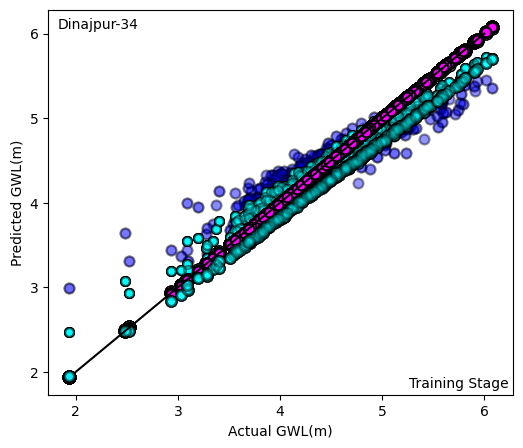

In [75]:
plt.figure(figsize=(6, 5))

plt.scatter(y_train, hybrid1_pred_train, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_train, hybrid2_pred_train, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_train, hybrid3_pred_train, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.03, label='Hybrid Model 3')
plt.scatter(y_train, hybrid4_pred_train, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_train,  hybrid5_pred_train, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_train, hybrid6_pred_train, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_train,  hybrid7_pred_train, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_train, hybrid8_pred_train, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_train, hybrid9_pred_train, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_train, hybrid10_pred_train, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')


plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Validation Stage: Actual vs. Predicted GWL(m)

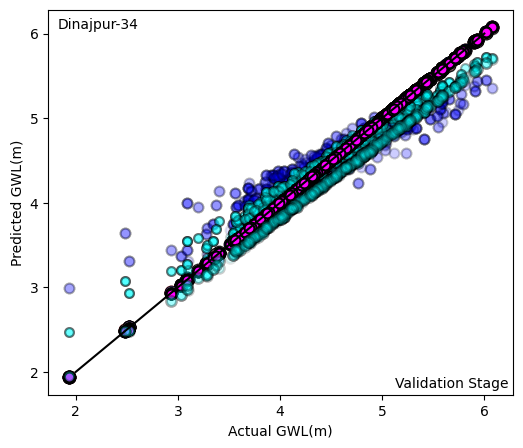

In [76]:
plt.figure(figsize=(6, 5))

plt.scatter(y_val, hybrid1_pred_val, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_val, hybrid2_pred_val, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_val, hybrid3_pred_val, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.1, label='Hybrid Model 3')
plt.scatter(y_val, hybrid4_pred_val, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_val,  hybrid5_pred_val, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_val, hybrid6_pred_val, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_val,  hybrid7_pred_val, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_val, hybrid8_pred_val, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_val, hybrid9_pred_val, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_val, hybrid10_pred_val, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')


plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Test Stage: Actual vs. Predicted GWL(m)

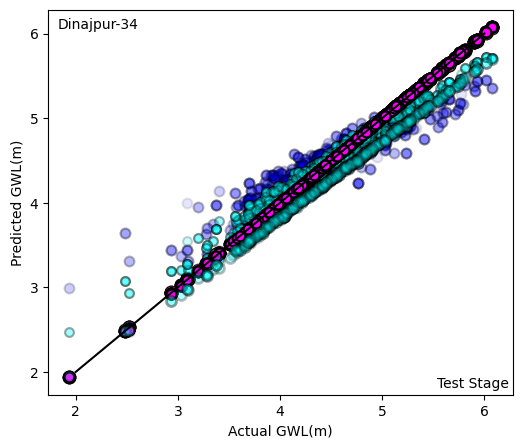

In [77]:
plt.figure(figsize=(6, 5))

plt.scatter(y_test, hybrid1_pred_test, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_test, hybrid2_pred_test, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_test, hybrid3_pred_test, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.1, label='Hybrid Model 3')
plt.scatter(y_test, hybrid4_pred_test, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_test,  hybrid5_pred_test, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_test, hybrid6_pred_test, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_test,  hybrid7_pred_test, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_test, hybrid8_pred_test, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_test, hybrid9_pred_test, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_test, hybrid10_pred_test, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')

plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Training Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

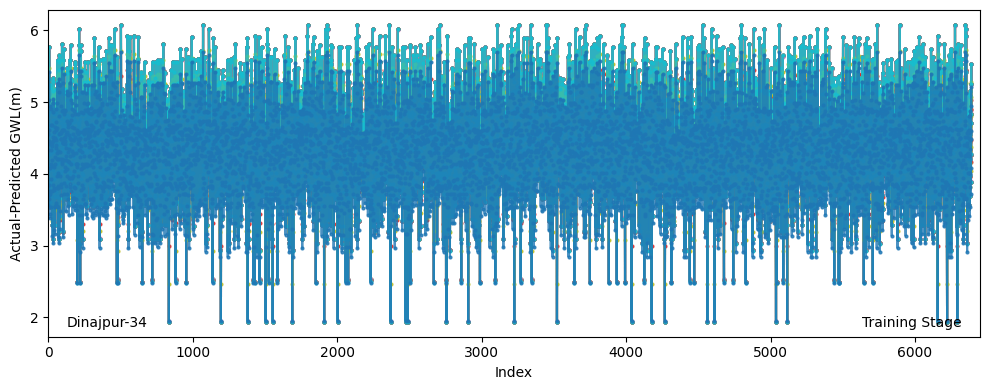

In [78]:
models_predictions_train = {
    'Hybrid Model 1': hybrid1_pred_train,
    'Hybrid Model 2': hybrid2_pred_train,
    'Hybrid Model 3': hybrid3_pred_train,
    'Hybrid Model 4': hybrid4_pred_train,
    'Hybrid Model 5': hybrid5_pred_train,
    'Hybrid Model 6': hybrid6_pred_train,
    'Hybrid Model 7': hybrid7_pred_train,
    'Hybrid Model 8': hybrid8_pred_train,
    'Hybrid Model 9': hybrid9_pred_train,
    'Hybrid Model 10': hybrid10_pred_train
}

actual_values = pd.DataFrame({'Actual Values': y_train.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for model_name, predictions in models_predictions_train.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=2, alpha=0.8)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-34", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.xlim(0, 6450)
plt.tight_layout()

plt.show()

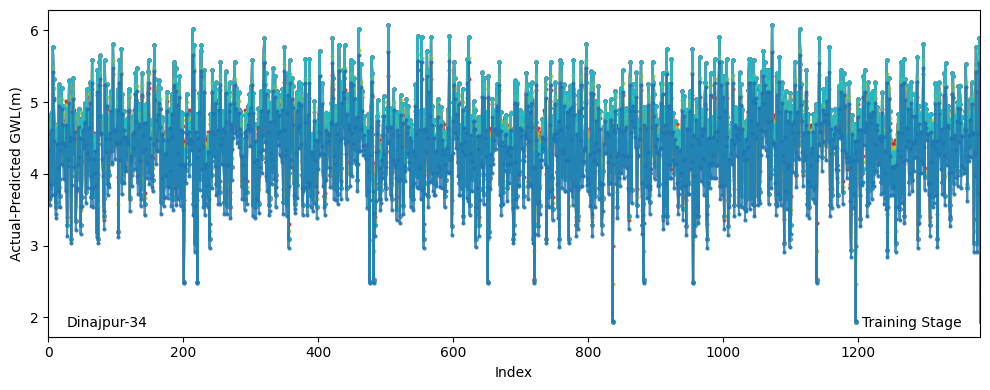

In [79]:
models_predictions_train = {
    'Hybrid Model 1': hybrid1_pred_train,
    'Hybrid Model 2': hybrid2_pred_train,
    'Hybrid Model 3': hybrid3_pred_train,
    'Hybrid Model 4': hybrid4_pred_train,
    'Hybrid Model 5': hybrid5_pred_train,
    'Hybrid Model 6': hybrid6_pred_train,
    'Hybrid Model 7': hybrid7_pred_train,
    'Hybrid Model 8': hybrid8_pred_train,
    'Hybrid Model 9': hybrid9_pred_train,
    'Hybrid Model 10': hybrid10_pred_train
}

actual_values = pd.DataFrame({'Actual Values': y_train.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for model_name, predictions in models_predictions_train.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=2, alpha=0.8)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-34", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

## Validation Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

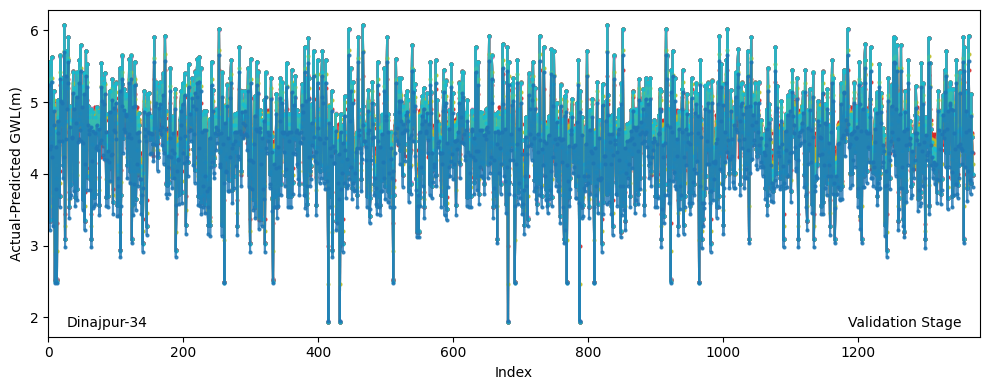

In [80]:
# Defining the models and their corresponding predictions
models_predictions_val = {
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val,
    'Hybrid Model 7': hybrid7_pred_val,
    'Hybrid Model 8': hybrid8_pred_val,
    'Hybrid Model 9': hybrid9_pred_val,
    'Hybrid Model 10': hybrid10_pred_val
}

actual_values = pd.DataFrame({'Actual Values': y_val.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for model_name, predictions in models_predictions_val.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=2, alpha=0.8)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-34", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.xlim(0, 1380)
plt.tight_layout()
plt.show()

## Test Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

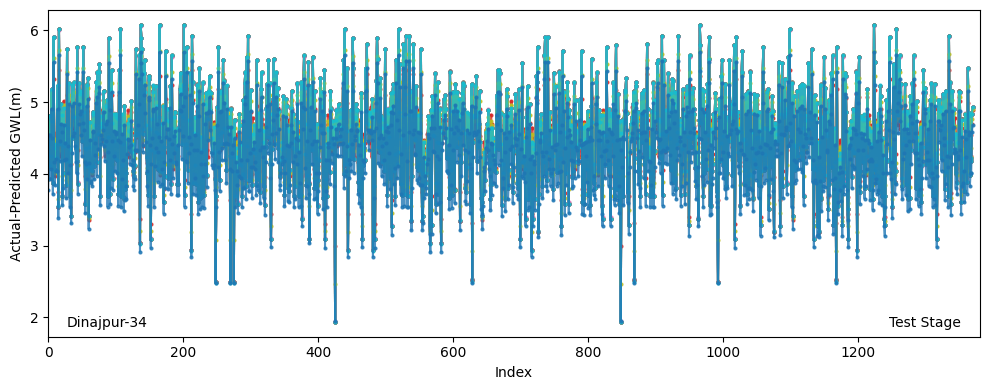

In [81]:
# Defining the models and their corresponding predictions
models_predictions = {
    'Hybrid Model 1': hybrid1_pred_test,
    'Hybrid Model 2': hybrid2_pred_test,
    'Hybrid Model 3': hybrid3_pred_test,
    'Hybrid Model 4': hybrid4_pred_test,
    'Hybrid Model 5': hybrid5_pred_test,
    'Hybrid Model 6': hybrid6_pred_test,
    'Hybrid Model 7': hybrid7_pred_test,
    'Hybrid Model 8': hybrid8_pred_test,
    'Hybrid Model 9': hybrid9_pred_test,
    'Hybrid Model 10': hybrid10_pred_test
}

actual_values = pd.DataFrame({'Actual Values': y_test.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for model_name, predictions in models_predictions.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=2, alpha=0.8)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.text(0.02, 0.02,"Dinajpur-34", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.grid(False)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

# Distribution plot and Time series analysis
## Training stage

In [82]:
dates_train = df.loc[y_train.index, 'Date']

hybrid_train_data = {'Actual Values': y_train.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_train,
                    'Hybrid Model 2 Predictions': hybrid2_pred_train,
                    'Hybrid Model 3 Predictions': hybrid3_pred_train,
                    'Hybrid Model 4 Predictions': hybrid4_pred_train,
                    'Hybrid Model 5 Predictions': hybrid5_pred_train,
                    'Hybrid Model 6 Predictions': hybrid6_pred_train,
                    'Hybrid Model 7 Predictions': hybrid7_pred_train,
                    'Hybrid Model 8 Predictions': hybrid8_pred_train,
                    'Hybrid Model 9 Predictions': hybrid9_pred_train,
                    'Hybrid Model 10 Predictions': hybrid10_pred_train,
                    'Date': dates_train}

hybrid_train_df = pd.DataFrame(hybrid_train_data)

print("\nTraining Set:")
hybrid_train_df


Training Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
3063,4.823333,4.823333,4.821112,4.583613,4.822001,4.821952,4.805071,4.823333,4.688740,4.820726,4.555031,2001-05-22
1940,4.575000,4.575000,4.575729,4.429380,4.575438,4.575451,4.571479,4.575000,4.499888,4.575633,4.331223,1998-04-25
6848,3.692000,3.692000,3.693475,4.228777,3.692885,3.692856,3.703532,3.692000,3.969679,3.692730,3.563019,2011-10-02
3509,3.807500,3.807500,3.806845,4.072717,3.807107,3.807082,3.808224,3.807500,3.940338,3.806767,3.643577,2002-08-11
1612,4.048000,4.048000,4.048064,3.968304,4.048038,4.048053,4.050169,4.048000,4.009818,4.047170,3.838017,1997-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3.890000,3.890000,3.889901,4.161467,3.889941,3.889798,3.903678,3.890000,4.035840,3.892690,3.724902,2008-09-13
5191,4.837500,4.837500,4.837194,4.836082,4.837316,4.837336,4.840862,4.837500,4.839190,4.837100,4.595905,2007-03-20
5390,4.267500,4.267500,4.269415,4.476734,4.268649,4.268703,4.270806,4.267500,4.375498,4.270800,4.075970,2007-10-05
860,5.532500,5.532500,5.532662,5.021829,5.532597,5.532641,5.525535,5.532500,5.272047,5.530906,5.203694,1995-05-11


In [83]:
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_train_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,4.518000,4.518000,4.517506,4.559638,4.517704,4.51767,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-02
1,4.518000,4.518000,4.517506,4.559638,4.517704,4.51767,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-03
2,4.518000,4.518000,4.517506,4.559638,4.517704,4.51767,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-05
3,4.518000,4.518000,4.517506,4.559638,4.517704,4.51767,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-06
4,4.518000,4.518000,4.517506,4.559638,4.517704,4.51767,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...
6386,5.133333,5.133333,5.131428,4.900424,5.132190,5.13214,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-24
6387,5.133333,5.133333,5.131428,4.900424,5.132190,5.13214,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-26
6388,5.133333,5.133333,5.131428,4.900424,5.132190,5.13214,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-27
6389,5.133333,5.133333,5.131428,4.900424,5.132190,5.13214,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-29


## Violin Plot: Distribution of predicted vs actual values groundwater level

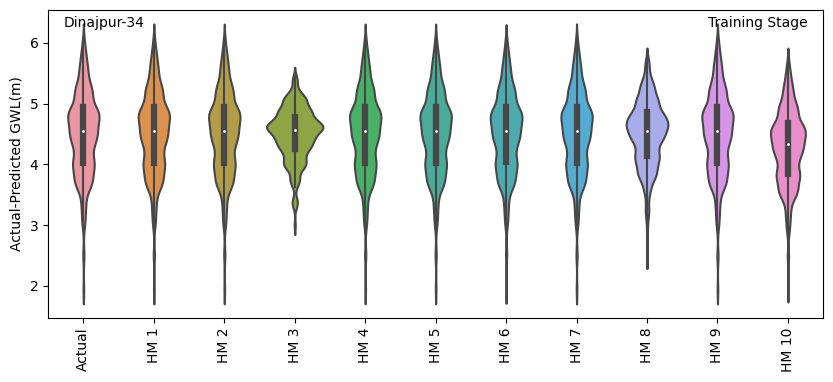

In [84]:
predictions_df = pd.DataFrame({
    'Actual': y_train.values,
    'HM 1': hybrid1_pred_train,
    'HM 2': hybrid2_pred_train,
    'HM 3': hybrid3_pred_train,
    'HM 4': hybrid4_pred_train,
    'HM 5': hybrid5_pred_train,
    'HM 6': hybrid6_pred_train,
    'HM 7': hybrid7_pred_train,
    'HM 8': hybrid8_pred_train,
    'HM 9': hybrid9_pred_train,
    'HM 10': hybrid10_pred_train,
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)

plt.ylabel('Actual-Predicted GWL(m)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [85]:
hybrid_train_df.T

,0,1,2,3,4,5,6,7,8,9,...,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390
Actual Values,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,...,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333
Hybrid Model 1 Predictions,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,...,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333
Hybrid Model 2 Predictions,4.517506,4.517506,4.517506,4.517506,4.517506,4.517506,4.517506,4.517506,4.517506,4.517506,...,5.131428,5.131428,5.131428,5.131428,5.131428,5.131428,5.131428,5.131428,5.131428,5.131428
Hybrid Model 3 Predictions,4.559638,4.559638,4.559638,4.559638,4.559638,4.559638,4.559638,4.559638,4.559638,4.559638,...,4.900424,4.900424,4.900424,4.900424,4.900424,4.900424,4.900424,4.900424,4.900424,4.900424
Hybrid Model 4 Predictions,4.517704,4.517704,4.517704,4.517704,4.517704,4.517704,4.517704,4.517704,4.517704,4.517704,...,5.13219,5.13219,5.13219,5.13219,5.13219,5.13219,5.13219,5.13219,5.13219,5.13219
Hybrid Model 5 Predictions,4.51767,4.51767,4.51767,4.51767,4.51767,4.51767,4.51767,4.51767,4.51767,4.51767,...,5.13214,5.13214,5.13214,5.13214,5.13214,5.13214,5.13214,5.13214,5.13214,5.13214
Hybrid Model 6 Predictions,4.51077,4.51077,4.51077,4.51077,4.51077,4.51077,4.51077,4.51077,4.51077,4.51077,...,5.122112,5.122112,5.122112,5.122112,5.122112,5.122112,5.122112,5.122112,5.122112,5.122112
Hybrid Model 7 Predictions,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,4.518,...,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333,5.133333
Hybrid Model 8 Predictions,4.533149,4.533149,4.533149,4.533149,4.533149,4.533149,4.533149,4.533149,4.533149,4.533149,...,5.007568,5.007568,5.007568,5.007568,5.007568,5.007568,5.007568,5.007568,5.007568,5.007568
Hybrid Model 9 Predictions,4.518489,4.518489,4.518489,4.518489,4.518489,4.518489,4.518489,4.518489,4.518489,4.518489,...,5.136044,5.136044,5.136044,5.136044,5.136044,5.136044,5.136044,5.136044,5.136044,5.136044


# Time series plots: predicted vs actual values groundwater level

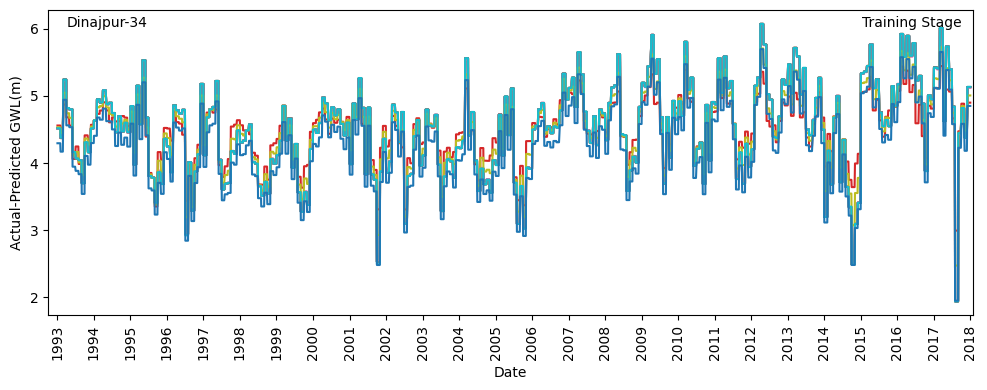

In [86]:
# Converting the 'Date' column to datetime format
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Iterating over the hybrid models and plot their predictions
for col in hybrid_train_df.columns[:-1]:
    plt.plot(hybrid_train_df['Date'], hybrid_train_df[col], label=col)


plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.88, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

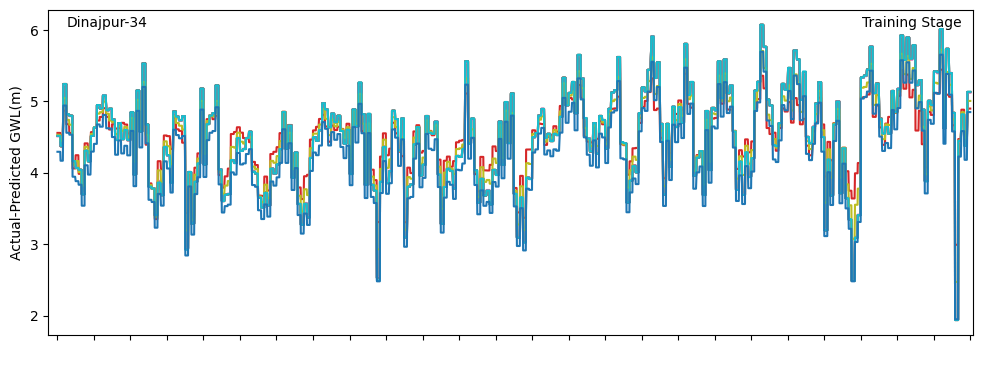

In [87]:
# Converting the 'Date' column to datetime format
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Iterating over the hybrid models and plot their predictions
for col in hybrid_train_df.columns[:-1]:
    plt.plot(hybrid_train_df['Date'], hybrid_train_df[col], label=col)


plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.88, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Validation stage

In [88]:
dates_val = df.loc[y_val.index, 'Date']

hybrid_val_data = {'Actual Values': y_val.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_val,
                    'Hybrid Model 2 Predictions': hybrid2_pred_val,
                    'Hybrid Model 3 Predictions': hybrid3_pred_val,
                    'Hybrid Model 4 Predictions': hybrid4_pred_val,
                    'Hybrid Model 5 Predictions': hybrid5_pred_val,
                    'Hybrid Model 6 Predictions': hybrid6_pred_val,
                    'Hybrid Model 7 Predictions': hybrid7_pred_val,
                    'Hybrid Model 8 Predictions': hybrid8_pred_val,
                    'Hybrid Model 9 Predictions': hybrid9_pred_val,
                    'Hybrid Model 10 Predictions': hybrid10_pred_val,
                    'Date': dates_val}

hybrid_val_df = pd.DataFrame(hybrid_val_data)

print("\nValidation Set:")
hybrid_val_df


Validation Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
7609,5.2720,5.2720,5.268635,5.054475,5.269981,5.269892,5.251425,5.2720,5.146226,5.269981,4.982957,2013-11-01
4084,5.5625,5.5625,5.561272,5.111932,5.561763,5.561992,5.542339,5.5625,5.321715,5.563371,5.235810,2004-03-08
7920,3.3425,3.3425,3.341414,3.749593,3.341849,3.341837,3.341854,3.3425,3.545064,3.349819,3.215781,2014-09-08
8327,4.5500,4.5500,4.550888,4.783846,4.550533,4.550561,4.554771,4.5500,4.670922,4.549436,4.346802,2015-10-20
2716,4.6375,4.6375,4.636289,4.436012,4.636773,4.636822,4.626253,4.6375,4.527812,4.636951,4.383359,2000-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...
5762,4.1000,4.1000,4.101469,4.343963,4.100882,4.101035,4.105899,4.1000,4.227182,4.093253,3.920387,2008-10-11
3254,3.8750,3.8750,3.874517,4.227446,3.874710,3.874691,3.880404,3.8750,4.055045,3.876399,3.717284,2001-11-29
4541,5.1125,5.1125,5.111165,4.584109,5.111699,5.111728,5.097767,5.1125,4.836676,5.111762,4.801472,2005-06-08
350,4.5180,4.5180,4.518250,4.570564,4.518150,4.518199,4.518652,4.5180,4.544921,4.518580,4.297519,1993-12-17


In [89]:
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_val_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-09
1,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-15
2,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-18
3,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-20
4,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,4.380000,4.380000,4.382538,4.575508,4.381523,4.381594,4.388425,4.380000,4.485268,4.378312,4.182333,2017-11-10
1366,5.133333,5.133333,5.131428,4.900424,5.132190,5.132140,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-17
1367,5.133333,5.133333,5.131428,4.900424,5.132190,5.132140,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-21
1368,5.133333,5.133333,5.131428,4.900424,5.132190,5.132140,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-23


## Violin Plot: Distribution of predicted vs actual values groundwater level

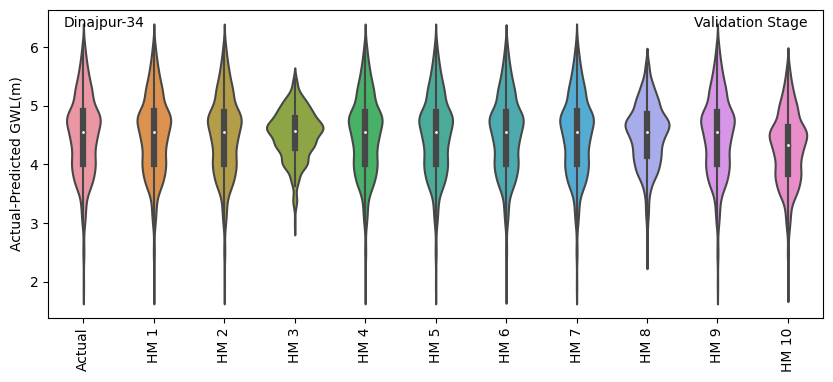

In [90]:
predictions_df = pd.DataFrame({
    'Actual': y_val.values,
    'HM 1': hybrid1_pred_val,
    'HM 2': hybrid2_pred_val,
    'HM 3': hybrid3_pred_val,
    'HM 4': hybrid4_pred_val,
    'HM 5': hybrid5_pred_val,
    'HM 6': hybrid6_pred_val,
    'HM 7': hybrid7_pred_val,
    'HM 8': hybrid8_pred_val,
    'HM 9': hybrid9_pred_val,
    'HM 10': hybrid10_pred_val,
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)

plt.ylabel('Actual-Predicted GWL(m)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [91]:
hybrid_val_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.82,4.82,4.82,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 1 Predictions,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.82,4.82,4.82,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 2 Predictions,4.517506,4.517506,4.517506,4.517506,4.517506,4.372973,4.372973,4.372973,4.372973,4.372973,...,4.817377,4.817377,4.817377,4.382538,4.382538,4.382538,5.131428,5.131428,5.131428,5.131428
Hybrid Model 3 Predictions,4.559638,4.559638,4.559638,4.559638,4.559638,4.523729,4.523729,4.523729,4.523729,4.523729,...,4.885059,4.885059,4.885059,4.575508,4.575508,4.575508,4.900424,4.900424,4.900424,4.900424
Hybrid Model 4 Predictions,4.517704,4.517704,4.517704,4.517704,4.517704,4.373117,4.373117,4.373117,4.373117,4.373117,...,4.818426,4.818426,4.818426,4.381523,4.381523,4.381523,5.13219,5.13219,5.13219,5.13219
Hybrid Model 5 Predictions,4.51767,4.51767,4.51767,4.51767,4.51767,4.373037,4.373037,4.373037,4.373037,4.373037,...,4.818238,4.818238,4.818238,4.381594,4.381594,4.381594,5.13214,5.13214,5.13214,5.13214
Hybrid Model 6 Predictions,4.51077,4.51077,4.51077,4.51077,4.51077,4.373884,4.373884,4.373884,4.373884,4.373884,...,4.817389,4.817389,4.817389,4.388425,4.388425,4.388425,5.122112,5.122112,5.122112,5.122112
Hybrid Model 7 Predictions,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.82,4.82,4.82,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 8 Predictions,4.533149,4.533149,4.533149,4.533149,4.533149,4.448722,4.448722,4.448722,4.448722,4.448722,...,4.84925,4.84925,4.84925,4.485268,4.485268,4.485268,5.007568,5.007568,5.007568,5.007568
Hybrid Model 9 Predictions,4.518489,4.518489,4.518489,4.518489,4.518489,4.37965,4.37965,4.37965,4.37965,4.37965,...,4.819889,4.819889,4.819889,4.378312,4.378312,4.378312,5.136044,5.136044,5.136044,5.136044


# Time series plots: predicted vs actual values groundwater level

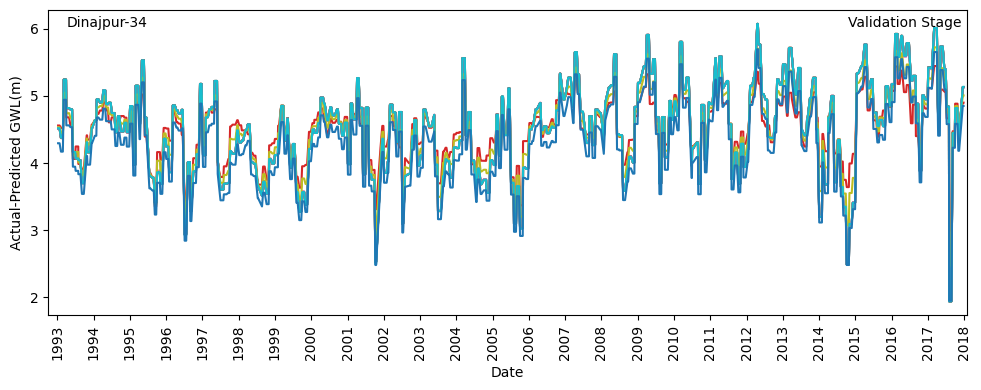

In [92]:
# Converting the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Iterating over the hybrid models and plot their predictions
for col in hybrid_val_df.columns[:-1]:
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col)


plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.87, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

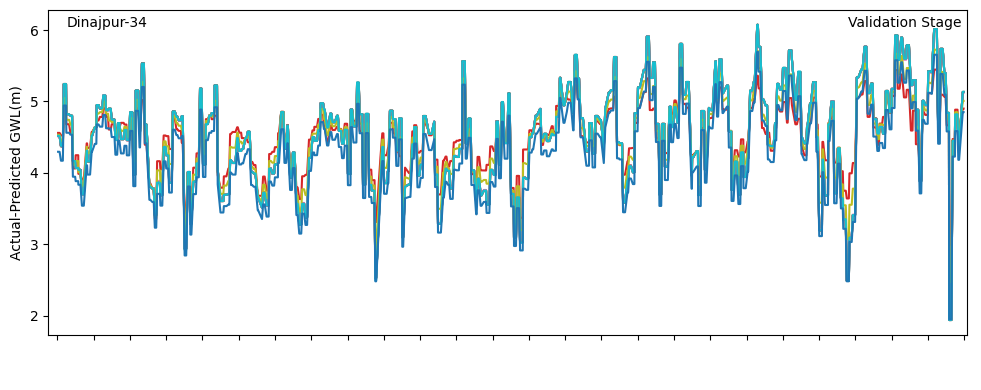

In [93]:
# Converting the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Iterating over the hybrid models and plot their predictions
for col in hybrid_val_df.columns[:-1]:
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col)


plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.87, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Test stage

In [94]:
dates_test = df.loc[y_test.index, 'Date']

hybrid_test_data = {'Actual Values': y_test.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_test,
                    'Hybrid Model 2 Predictions': hybrid2_pred_test,
                    'Hybrid Model 3 Predictions': hybrid3_pred_test,
                    'Hybrid Model 4 Predictions': hybrid4_pred_test,
                    'Hybrid Model 5 Predictions': hybrid5_pred_test,
                    'Hybrid Model 6 Predictions': hybrid6_pred_test,
                    'Hybrid Model 7 Predictions': hybrid7_pred_test,
                    'Hybrid Model 8 Predictions': hybrid8_pred_test,
                    'Hybrid Model 9 Predictions': hybrid9_pred_test,
                    'Hybrid Model 10 Predictions': hybrid10_pred_test,
                    'Date': dates_test}

hybrid_test_df = pd.DataFrame(hybrid_test_data)

print("\nTest Set:")
hybrid_test_df


Test Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
4710,3.934000,3.934000,3.935890,4.326460,3.935134,3.935074,3.940005,3.934000,4.135539,3.933466,3.777642,2005-11-24
131,4.800000,4.800000,4.799555,4.557943,4.799733,4.799856,4.793364,4.800000,4.673887,4.800311,4.534643,1993-05-12
2802,4.800000,4.800000,4.798529,4.646174,4.799117,4.799162,4.792276,4.800000,4.716665,4.800311,4.543309,2000-09-03
4472,4.110000,4.110000,4.111000,4.292269,4.110600,4.110546,4.117536,4.110000,4.207196,4.113694,3.924078,2005-03-31
1108,4.248333,4.248333,4.244579,4.514539,4.246081,4.245898,4.239768,4.248333,4.373186,4.245174,4.060598,1996-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...
2948,3.984000,3.984000,3.990108,4.370623,3.987665,3.987747,4.000840,3.984000,4.192751,3.982356,3.826856,2001-01-27
6394,4.213333,4.213333,4.213280,4.248420,4.213301,4.213279,4.216714,4.213333,4.233372,4.213677,4.006711,2010-07-05
1746,4.178333,4.178333,4.179064,4.544009,4.178772,4.178865,4.180003,4.178333,4.362822,4.179725,4.006323,1997-10-13
5820,4.837500,4.837500,4.836998,4.699362,4.837199,4.837154,4.837795,4.837500,4.768393,4.837100,4.581806,2008-12-08


In [95]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)
hybrid_test_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-01
1,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-04
2,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-13
3,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-27
4,4.518000,4.518000,4.517506,4.559638,4.517704,4.517670,4.510770,4.518000,4.533149,4.518489,4.295029,1993-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,4.380000,4.380000,4.382538,4.575508,4.381523,4.381594,4.388425,4.380000,4.485268,4.378312,4.182333,2017-11-30
1366,5.133333,5.133333,5.131428,4.900424,5.132190,5.132140,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-07
1367,5.133333,5.133333,5.131428,4.900424,5.132190,5.132140,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-10
1368,5.133333,5.133333,5.131428,4.900424,5.132190,5.132140,5.122112,5.133333,5.007568,5.136044,4.851321,2017-12-28


# Violin Plot: Distribution of Predicted vs Actual Values

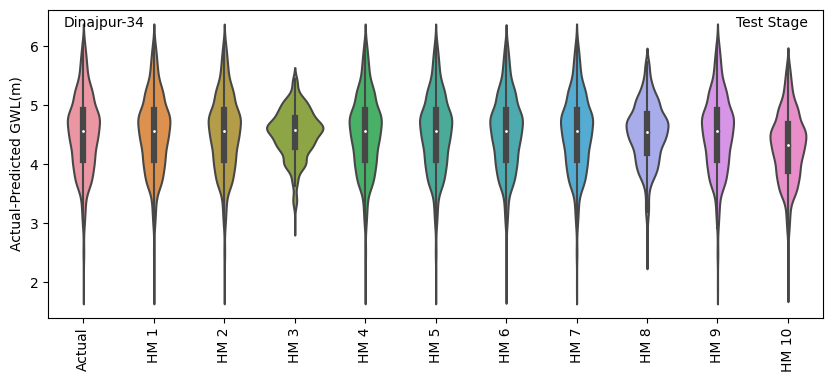

In [96]:
# Combining the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'HM 1': hybrid1_pred_test,
    'HM 2': hybrid2_pred_test,
    'HM 3': hybrid3_pred_test,
    'HM 4': hybrid4_pred_test,
    'HM 5': hybrid5_pred_test,
    'HM 6': hybrid6_pred_test,
    'HM 7': hybrid7_pred_test,
    'HM 8': hybrid8_pred_test,
    'HM 9': hybrid9_pred_test,
    'HM 10': hybrid10_pred_test,
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)

plt.ylabel('Actual-Predicted GWL(m)')
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [97]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_test_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.38,4.38,4.38,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 1 Predictions,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.38,4.38,4.38,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 2 Predictions,4.517506,4.517506,4.517506,4.517506,4.517506,4.372973,4.372973,4.372973,4.372973,4.372973,...,4.382538,4.382538,4.382538,4.382538,4.382538,4.382538,5.131428,5.131428,5.131428,5.131428
Hybrid Model 3 Predictions,4.559638,4.559638,4.559638,4.559638,4.559638,4.523729,4.523729,4.523729,4.523729,4.523729,...,4.575508,4.575508,4.575508,4.575508,4.575508,4.575508,4.900424,4.900424,4.900424,4.900424
Hybrid Model 4 Predictions,4.517704,4.517704,4.517704,4.517704,4.517704,4.373117,4.373117,4.373117,4.373117,4.373117,...,4.381523,4.381523,4.381523,4.381523,4.381523,4.381523,5.13219,5.13219,5.13219,5.13219
Hybrid Model 5 Predictions,4.51767,4.51767,4.51767,4.51767,4.51767,4.373037,4.373037,4.373037,4.373037,4.373037,...,4.381594,4.381594,4.381594,4.381594,4.381594,4.381594,5.13214,5.13214,5.13214,5.13214
Hybrid Model 6 Predictions,4.51077,4.51077,4.51077,4.51077,4.51077,4.373884,4.373884,4.373884,4.373884,4.373884,...,4.388425,4.388425,4.388425,4.388425,4.388425,4.388425,5.122112,5.122112,5.122112,5.122112
Hybrid Model 7 Predictions,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.38,4.38,4.38,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 8 Predictions,4.533149,4.533149,4.533149,4.533149,4.533149,4.448722,4.448722,4.448722,4.448722,4.448722,...,4.485268,4.485268,4.485268,4.485268,4.485268,4.485268,5.007568,5.007568,5.007568,5.007568
Hybrid Model 9 Predictions,4.518489,4.518489,4.518489,4.518489,4.518489,4.37965,4.37965,4.37965,4.37965,4.37965,...,4.378312,4.378312,4.378312,4.378312,4.378312,4.378312,5.136044,5.136044,5.136044,5.136044


# Time series plots: Test stage

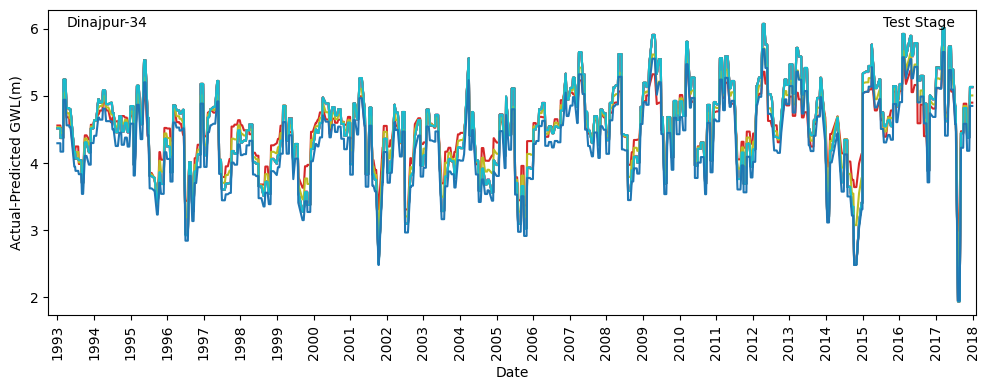

In [98]:
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

plt.figure(figsize=(10, 4))

# Iterating over the hybrid models and plot their predictions
for col in hybrid_test_df.columns[:-1]:
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()

# Density Plot: Training stage

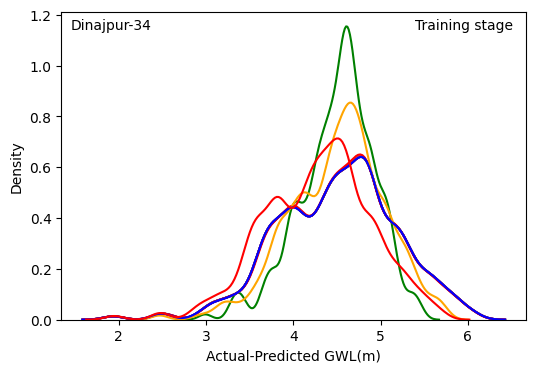

In [105]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_train.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_train, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_train, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_train, color='green', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_train, color='purple', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_train, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_train, color='red', label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_train, color='purple', label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_train, color='orange', label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_train, color='blue', label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_train, color='red', label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.76, 0.98, "Training stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Validation stage

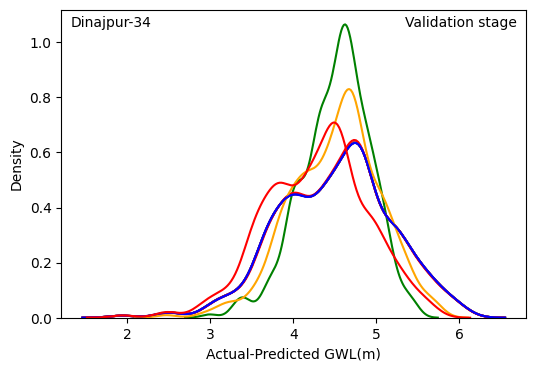

In [100]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_val.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_val, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_val, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_val, color='green', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_val, color='purple', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_val, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_val, color='red', label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_val, color='purple', label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_val, color='orange', label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_val, color='blue', label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_val, color='red', label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.74, 0.98, "Validation stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Test stage

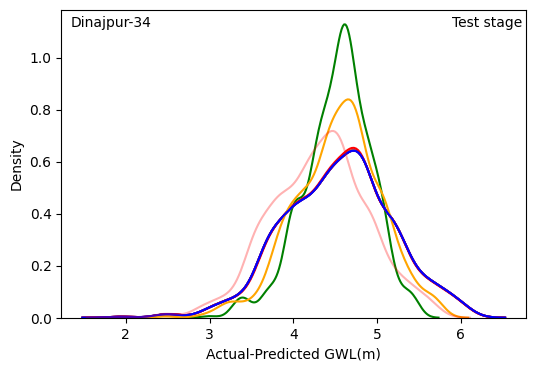

In [103]:
plt.figure(figsize=(6, 4))

# Defining a list of colors for the density plots
colors = ['green', 'blue', 'green', 'purple', 'orange', 'red', 'purple', 'orange', 'blue', "red"]

# Plotting density plots for each hybrid model with different colors
sns.kdeplot(y_test.values, color=colors[-2], label='Actual')
sns.kdeplot(hybrid1_pred_test, color=colors[5], label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_test, color=colors[1], alpha=0.3, label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_test, color=colors[2], label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_test, color=colors[3], label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_test, color=colors[4], label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_test, color=colors[5], label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_test, color=colors[6], label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_test, color=colors[7],label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_test, color=colors[8], label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_test, color=colors[9], alpha=0.3,label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.84, 0.98, "Test stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()